<a href="https://colab.research.google.com/github/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/blob/master/02_FUNCION_DISTRIBUCION_GAUSSIANA_Y_TEOREMA_BAYES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/master/init.py
import init; init.init(force_download=False); 
from IPython.display import Image

replicating local resources


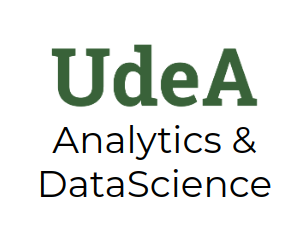

In [ ]:
Image("local/imgs/udea-datascience.png")

# **Función de distribución Gaussiana y Teorema de Bayes**
## Desarrollado por: Ph.D. Javier Fernando Botía Valderrama
## Universidad de Antioquia

# Distribuciones apriori y aposteriori

**Ejemplo:** Considere una banda transportadora que clasifica dos frutas, $M$ que son melocotones y $C$ que son cerezas. Si alguien observa la banda transportadora, es muy díficil predecir que tipo de fruta aparecerá en la banda. Para resolver este problema, consideremos dos estados: o $M$ o $C$ y definimos $y$ como el estado que designa la pertenencia a una de las frutas, es decir, $y = M$ e $y = C$, donde $x$ es una variable aleatoria.

Si la cosecha de melocotones es más o menos igual al de las cerezas, se establece que la siguiente fruta que va a aparecer tiene la misma probabilidad de ser $M$ o $C$. De esta forma, la **distribución apriori** $P(y = M)$ es la probabilidad que la siguiente fruta sea un melocotón y $P(y = C)$ es la probabilidad que la siguiente fruta sea una cereza. Estas probabilidades apriori reflejan el conocimiento previo sobre cuál es la probabilidad que aparezca un melocotón o una cereza antes que se muestre la siguiente fruta. Una propiedad que cumple ambas probabilidades es la siguiente:

$$P(y = M) + P(y = C) = 1$$

Ahora consideremos $x$ como la componente del color de la fruta. De esta manera, diferentes muestras de frutas darán diferentes valores de $x$, que permite establecer dichos valores en términos probabilísticos. Al tener presente $x$ e $y$, definimos dos funciones de densidad de probabilidad condicionales para un $x$ dado que el tipo de fruta sea $M$ o $C$:

$$p(x \vert y = M);\,\, p(x \vert y = C)$$

Supongamos ahora que conocemos las anteriores probabilidades pero se desea saber como medimos la componente de color de un melocotón o de una cereza y determinamos que vale $x$. Para este caso, utilizamos la **regla de Bayes:**

$$P(y = M \vert x) = \frac{P(x\vert y=M)P(y = M)}{P(x)}$$

$$P(y = C \vert x) = \frac{P(x\vert y=C)P(y = C)}{P(x)}$$

La regla de Bayes indica como un valor de $x$ cambia las probabilidades apriori a las **probabilidades o distribuciones aposteriori**, expresados como $P(y = M \vert x)$ y $P(y = C \vert x)$. Es importante considerar que $P(x)$ se determina como:

$$P(x) = P(x\vert y=M)P(y = M) + P(x\vert y=C)P(y = C)$$

La anterior ecuación es una constante de normalización que no necesita ser obtenida cuando se va a tomar una decisión puesto que la regla de Bayes es una comparación entre valores relativos de las probabilidades aposteriori.

De manera formal, se puede definir las dos distribuciones como:

*   **Distribución apriori:** es la probabilidad que la variable aleatoria $y$ *considere* el valor $x$. Cuando se tiene en cuenta todos los valores de $y$, entonces la distribución de probabilidad apriori es $P(y)$
*   **Distribución aposteriori:** es la probabilidad que la variable aleatoria $y$ *tenga* un valor $x$, basado en la evidencia presente, es decir, los datos $x$, y el conocimiento apriori.  

Veamos a continuación un ejemplo práctico de la regla de Bayes.

In [ ]:
def Regla_Bayes(p_yM, p_yC, p_xy_M, p_xy_C):
  p_x = p_xy_M*p_yM + p_xy_C*p_yC
  p_yx_M = (p_xy_M*p_yM)/p_x
  p_yx_C = (p_xy_C*p_yC)/p_x
  return p_yx_M, p_yx_C

In [ ]:
p_yM = 0.10
p_yC = 0.29
p_xy_M = 0.65
p_xy_C = 0.28

p_yx_M, p_yx_C = Regla_Bayes(p_yM, p_yC, p_xy_M, p_xy_C)
print("P(y=M|x)= {:.2f}".format(p_yx_M))
print("P(y=C|x)= {:.2f}".format(p_yx_C))

P(y=M|x)= 0.44
P(y=C|x)= 0.56


Otra de las características de la regla de Bayes es la **función discriminante**, que permite clasificar de acuerdo a un conjunto de restricciones, tales como:

$$f(x) = \begin{cases} C\,\,\,\,\,\, Si\,\, P(x\vert y = C)P(y = C) > P(x\vert y = M)P(y = M)\\
M\,\,\,\,\,\, Si\,\, P(x\vert y = C)P(y = C) \leq P(x\vert y = M)P(y = M)\end{cases}$$

Veamos un ejemplo de esta función

In [ ]:
def Fun_Discriminante(p_yM, p_yC, p_xy_M, p_xy_C):
  Producto_1 = p_xy_M*p_yM
  Producto_2 = p_xy_C*p_yC
  if Producto_1 > Producto_2:
    print("La siguiente Fruta que sale es una Cereza")
  elif Producto_1 <= Producto_2:
    print("La siguiente Fruta que sale es un Melocotón")  

In [ ]:
Fruta = Fun_Discriminante(p_yM, p_yC, p_xy_M, p_xy_C)

La siguiente Fruta que sale es un Melocotón


Consideremos ahora que hay varios tipos de fruta y el número de atributos dados por el vector de atributos es $x = \lbrace x_1,\ldots, x_D\rbrace$, siendo $D$ el número de atributos o dimensiones, la regla de Bayes debe clasificar de forma general más **clases** que representa para este ejemplo varios tipos de fruta. Consideremos un vector de clases, $C = \lbrace C_1,\ldots, C_j, \ldots, C_K \rbrace$, y decimos que la distribución apriori esta dado por $P(y = C_j)$ y por consiguiente, se conoce o se puede estimar $P(x\vert y = C_j)$. A partir de dichas probabilidades, se puede calcular para cada elemento de $x$ la probabilidad que ese elemento pertenezca a una determinada clase. Para este caso, la probabilidad aposteriori se expresa como:

$$P(y = C_j \vert x) = \frac{P(x\vert y = C_j)P(y = C_j)}{P(x)}$$

donde:

$$P(x) = \sum_{j=1}^K P(x \vert y = C_j)P(y = C_j)$$

Si queremos definir una regla de decisión para clasificar diferentes tipos de fruta, se puede establecer una regla dada por:

$$Si\,\,\,\, P(y = C_i \vert x) > P(y = C_j \vert x)\,\,\,\, entonces \,\,\,\, x \in c_i, \,\,\,\, considerando \,\,\,\, \forall i \neq j$$

Es importante considerar que $i$ y $j$ son dos clases diferentes. Por lo general, en un **Clasificador Bayesiano** no considera $P(x)$ porque solo normaliza la probabilidad aposteriori $P(y = C_j \vert x)$. Entonces, una forma más apropiada de definir la regla de decisión es:

$$Si\,\,\,\, P(y = C_i \vert x)P(y = C_i) > P(y = C_j \vert x)P(y = C_j)\,\,\,\, entonces \,\,\,\, x \in c_i, \,\,\,\, considerando \,\,\,\, \forall i \neq j$$

Para este tipo de clasificación, las distribuciones de densidad de probabilidad pueden ser **Gaussianas**.

Veamos un ejemplo práctico.

In [ ]:
import numpy as np
import scipy.stats as st
from matplotlib import pyplot
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

media_conocida1 = 0.5
std_conocida1 = 0.7

media_conocida2 = 0.25
std_conocida2 = 0.75

X1 = np.random.normal(media_conocida1, std_conocida1**2, 100)
X2 = np.random.normal(media_conocida2, std_conocida2**2, 100)

media_data1 = X1.mean()
media_data2 = X2.mean()

p_y_1 = 1/(std_conocida1 * np.sqrt(2 * np.pi)) * np.exp( - (media_data1 - media_conocida1)**2 / (2 * std_conocida1**2))
p_y_2 = 1/(std_conocida2 * np.sqrt(2 * np.pi)) * np.exp( - (media_data2 - media_conocida2)**2 / (2 * std_conocida2**2))

print('Probabilidad apriori de la clase 1: {:.4f}'.format(p_y_1))
print('Probabilidad apriori de la clase 2: {:.4f}'.format(p_y_2))

Probabilidad apriori de la clase 1: 0.5685
Probabilidad apriori de la clase 2: 0.5319


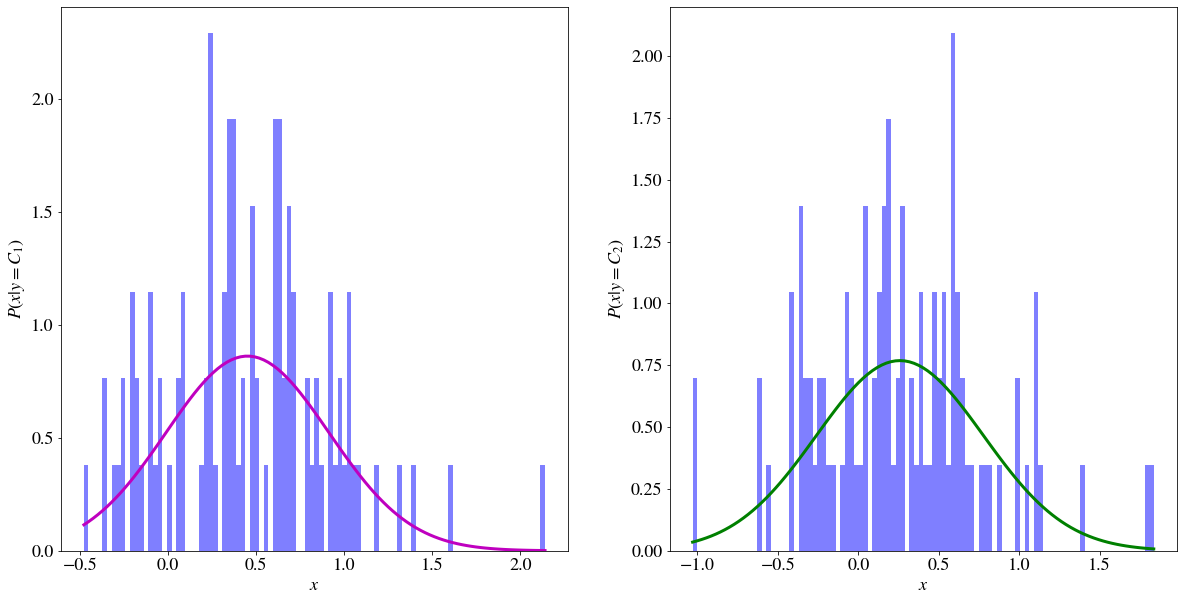

In [ ]:
std_data1 = X1.std()
std_data2 = X2.std()

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig = pyplot.figure(figsize=(20,10))

ax1 = fig.add_subplot(1, 2, 1)
count1, xx1, ignored1 = pyplot.hist(X1, 100, density=True, facecolor='b', alpha=0.5) 
p_x_y_1 = 1/(std_data1 * np.sqrt(2 * np.pi)) * np.exp( - (xx1 - media_data1)**2 / (2 * std_data1**2))
pyplot.plot(xx1, p_x_y_1, linewidth = 3, color='m')
pyplot.xlabel('$x$') # Etiqueta del eje x
pyplot.ylabel('$P(x| y = C_1)$') # Etiqueta del eje y 

ax2 = fig.add_subplot(1, 2, 2)
count2, xx2, ignored2 = pyplot.hist(X2, 100, density=True, facecolor='b', alpha=0.5) 
p_x_y_2 = 1/(std_data2 * np.sqrt(2 * np.pi)) * np.exp( - (xx2 - media_data2)**2 / (2 * std_data2**2))
pyplot.plot(xx2, p_x_y_2, linewidth = 3, color='g')
pyplot.xlabel('$x$') # Etiqueta del eje x
pyplot.ylabel('$P(x| y = C_2)$') # Etiqueta del eje y  

pyplot.show()

In [ ]:
# Calculando P(x)
P_x_y = np.array([p_x_y_1, p_x_y_2]).T
P_y = np.array([p_y_1, p_y_2])
P_x = np.sum(np.prod([P_x_y,P_y]),axis = 1)

In [ ]:
def Bayes_Clase(p_x, p_y, p_xy):
  p_yx  = []
  p_yx = np.prod([p_xy,p_y])/np.sum(P_x)
  return p_yx

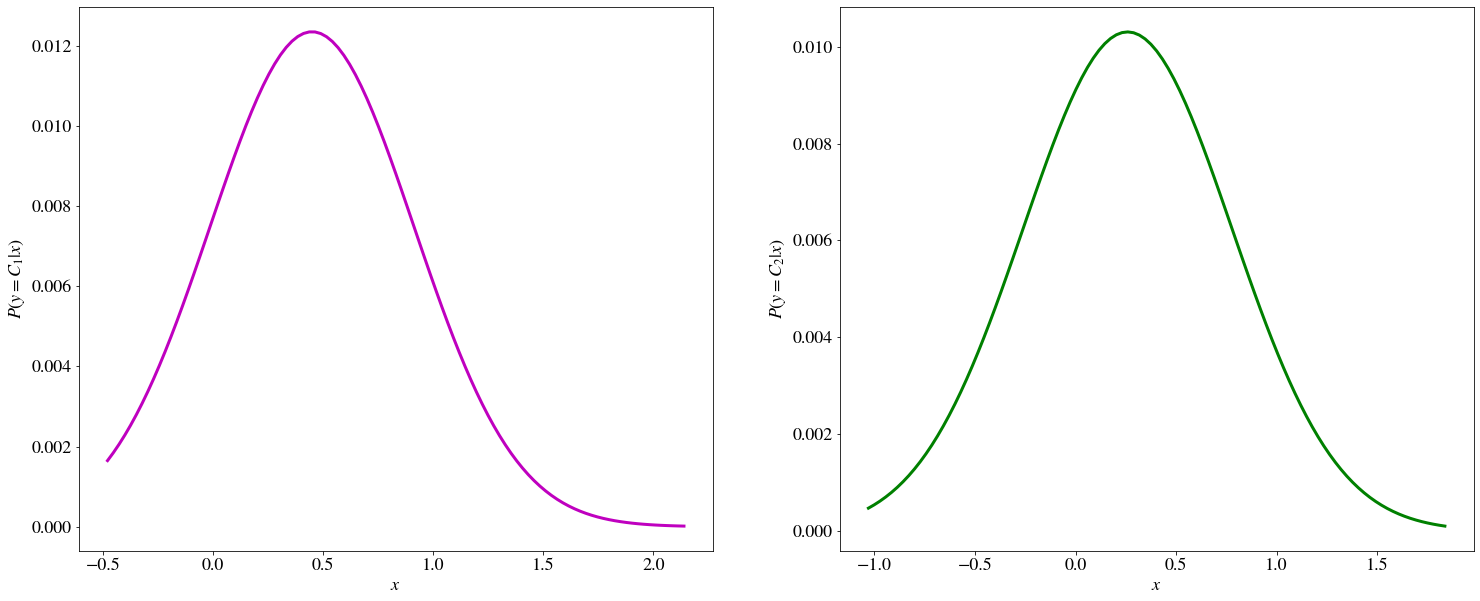

In [ ]:
P_YX = Bayes_Clase(P_x, P_y, P_x_y) # Probabilidades P(y = C_j | x)

fig = pyplot.figure(figsize=(25,10))

ax1 = fig.add_subplot(1, 2, 1)
pyplot.plot(xx1, P_YX[:,0], linewidth = 3, color='m')
pyplot.xlabel('$x$') # Etiqueta del eje x
pyplot.ylabel('$P(y = C_1 | x)$') # Etiqueta del eje y

ax1 = fig.add_subplot(1, 2, 2)
pyplot.plot(xx2, P_YX[:,1], linewidth = 3, color='g')
pyplot.xlabel('$x$') # Etiqueta del eje x
pyplot.ylabel('$P(y = C_2 | x)$') # Etiqueta del eje y
pyplot.show()

In [ ]:
def decision(p_y, p_yx):
  Productos = np.prod([p_yx,p_y])
  Clases = np.argmax(Productos,axis = 1) # Se calcula el argumento del máximo
  return Clases

In [ ]:
CLASES = decision(P_y, P_YX)
CLASES

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

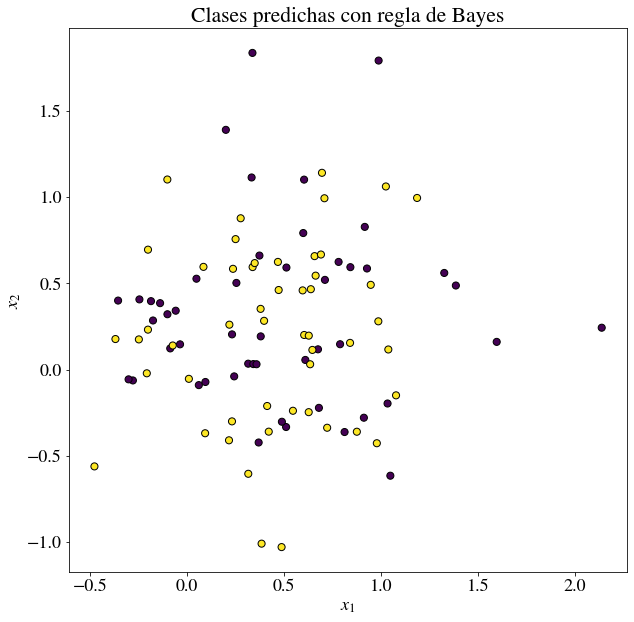

In [ ]:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig = pyplot.figure(figsize=(10,10))
pyplot.scatter(X1, X2, c = CLASES[0:X1.shape[0]], s = 50, edgecolor='k')
pyplot.xlabel('$x_1$') # Etiqueta del eje x
pyplot.ylabel('$x_2$') # Etiqueta del eje y
pyplot.title('Clases predichas con regla de Bayes') # Titulo de la gráfica
pyplot.show()

Observen que en el ejemplo anterior, aunque la regla de Bayes realizó una clasificación de los datos a partir de una función de densidad de probabilidad Gaussiana, **uno de los principales inconvenientes es la separabilidad entre clases para diferenciar aquellos datos que pertenencen a una clase con respecto a otra**. Una de las alternativas para lograr la separabilidad entre datos es una métrica de distancia entre datos y la media. Para este caso, se analizará la **distancia de Mahalanobis**, considerando distribuciones de probabilidad Gaussiana.

Decimos que una regla de decisión basado en una distancia de Mahalanobis, $d_M^2 (x,\mu_j)$, donde $\mu_j$ es la media de una clase $j$, con respecto a otra distancia de Mahalanobis, $d_M^2 (x,\mu_i)$, donde $\mu_i$ es la media de una clase $i$, se establece como:

$$Si\,\,\,\, d_M^2 (x,\mu_i) < d_M^2 (x,\mu_j)\,\, entonces\,\, x\in C_i, \,\, \forall i \neq j$$

donde para un vector de datos $x_n = \lbrack x_{n,1}, \ldots, x_{n,d}, \ldots, x_{n,D} \rbrace$, la distancia se expresa como:

$$d_M^2 (x_n,\mu_i) = (x_n - \mu_i)^T \Sigma_i^{-1} (x_n - \mu_i)$$

siendo $\Sigma_i^{-1}$ la inversa de la matriz de covarianza de una clase $i$, donde $\Sigma$ esta dado por:

$$\Sigma_i = \frac{1}{N - 1} \sum_{n=1}^N (x_n - \mu_i)(x_n - \mu_i)^T$$

donde $N$ es el número de muestras o observaciones de los datos y $D$ es el número de descriptores, variables, atributos o características.

Si $\Sigma = I$, donde $I$ es la matriz identidad, obtenemos una métrica llamada **distancia Euclidiana**, y por consiguiente, la distancia se expresa como:

$$d_E^2 (x_n,\mu_i) = (x_n - \mu_i)^T(x_n - \mu_i) = x_n^Tx_n - 2x^T\mu_i + \mu_i^T \mu_i$$

Por lo general, $x_n^Tx_n$ se puede despreciar porque se repite para todas las clases para definir la *función discirminante euclidiano*, el cual se expresa como:

$$f_E (x\vert \mu_i) = x^T \mu_i - \frac{1}{2} \mu_i^T \mu_i$$

La anterior función se obtiene al dividir por 2 y al cambiar el signo de la métrica $d_E^2 (x_n,\mu_i)$, considerando valido para $\forall x_n \in x$ 

Analicemos que sucede si utilizamos esta función discriminante en el ejemplo anterior.

In [ ]:
def f_dis_Euclidiana(x, XX, media):
  Decisiones = x.T.dot(media) - 0.5*media.T.dot(media)
  fe_1 = XX[0].T*(media[0]) - 0.5*media[0].T*(media[0])
  fe_2 = XX[1].T*(media[1]) - 0.5*media[1].T*(media[1])
  UMBRALES = np.array([fe_1, fe_2])
  CLASES_U = np.argmax(UMBRALES, axis=0)
  return Decisiones, CLASES_U 

Número de clases C1 =  58
Número de clases C2 =  42


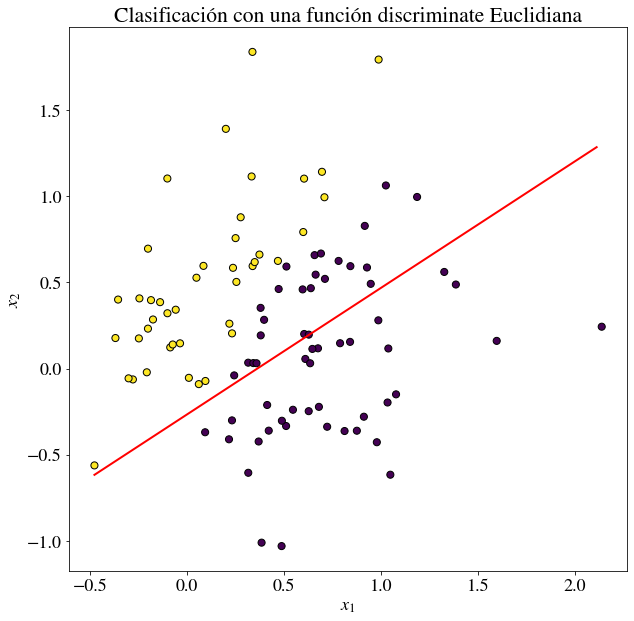

In [ ]:
media_clase = np.array([media_data1, media_data2])
X = np.array([xx1,xx2])
xx = np.array([X1,X2])
Decision, clases  = f_dis_Euclidiana(X, xx, media_clase)

print("Número de clases C1 = ",np.asarray(np.where(clases == 0)).shape[1])
print("Número de clases C2 = ",np.asarray(np.where(clases == 1)).shape[1])

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig = pyplot.figure(figsize=(10,10))
pyplot.scatter(X1, X2, c = clases ,s = 50, edgecolor='k')
pyplot.plot(xx1[0:xx.shape[1]], Decision[0:xx.shape[1]], color='red', linewidth = 2)
pyplot.xlabel('$x_1$') # Etiqueta del eje x
pyplot.ylabel('$x_2$') # Etiqueta del eje y
pyplot.title('Clasificación con una función discriminate Euclidiana') # Titulo de la gráfica
pyplot.show()

Observen que mejoro la clasificación de los datos con respecto a la regla de Bayes, sin embargo, hay varios datos que sobrepasaron la función discriminante que pertenencen a otra clase diferente, generando un *error de clasificación*. Cuando se presenta este tipo de casos, se utiliza **medidas estadísticas de separabilidad** que permite conocer el grado de separabilidad entre dos clases. Para este caso, se aplicará el *coseno del ángulo formado por la media*, dado por:

$$cos \alpha_{i,j} = \frac{\mu_i^T \mu_j}{\vert \mu_i \vert \cdot \vert \mu_j \vert}$$

Cuando el paralelismo es mayor entre los vectores de la media de dos clases, las clases serán más similares. Por consiguiente, un mayor valor de $cos \alpha_{i,j}$ expresa mayor similitud entre dos clases.

Una característica importante de la regla de Bayes es el concepto de **evidencia**. Por definición, la evidencia es la probabilidad de $x$ de acuerdo a un *modelo de probabilidad*, que se calcula como la suma a lo largo de los posibles valores de los parámetros y ponderando por parámetros conocidos de acuerdo a un conocimiento previo.

Considerando el anterior concepto, definimos $MO$ como un modelo de probabilidad tal que:

$$P(y = M \vert x, MO) = \frac{P(x\vert y=M, MO)P(y = M \vert MO)}{P(x\vert MO)}$$

La anterior regla de Bayes se emplea cuando hay más de un modelo de probabilidad y cuando los datos nos permite encontrar la certeza que deseamos obtener de un modelo. En este caso, si hay dos modelos, $MO_1$ y $MO_2$, se puede determinar un cociente entre $P(MO_1 \vert x)$ y $P(MO_2 \vert x)$, expresado como:

$$\frac{P(MO_1 \vert x)}{P(MO_2 \vert x)} = \frac{P(x\vert MO_1) P(MO_1)}{P(x\vert MO_2) P(MO_2)}$$

Lo anterior se llama el **factor Bayesiano o de Bayes** y $P(MO_1)$ y $P(MO_2)$ son las funciones de probabilidad iniciales que suponemos de los dos modelos. Usualmente, el factor Bayesiano nos informa sobre los cambios en nuestras suposiciones de los modelos causados por los datos.

Veamos un ejemplo práctico del factor de Bayes:

In [ ]:
def BETA_BINOMIAL(parametros, x):
    alpha, beta = parametros
    h = np.sum(x)
    n = len(x)
    p_MO_x = np.exp(betaln(alpha + h, beta+n-h) - betaln(alpha, beta)) # Probabilidad Marginal Beta Binomial
    return p_MO_x

Factor de Bayes o Bayesiano =  2.0


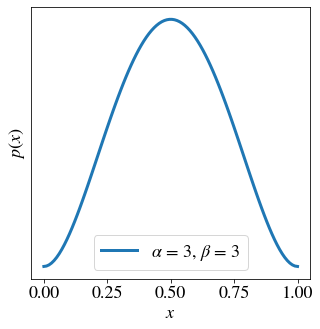

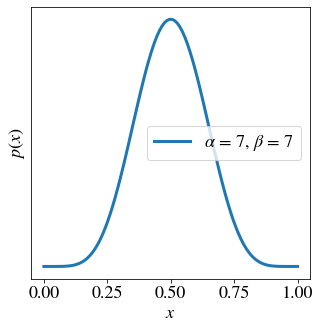

In [ ]:
import numpy as np
from scipy.stats import beta # Distribución Beta
from scipy.special import betaln # Logarítmo Natural del valor absoluto de la función Beta
from matplotlib import pyplot
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
x = np.repeat([1, 0], [100, 100])
PARAMETROS = ((3, 3), (7, 7))

for a, b in PARAMETROS:
    distribucion = beta(a, b)
    X = np.linspace(0, 1, 100)
    proba = distribucion.pdf(X)
    fig = pyplot.figure(figsize=(5,5))  
    pyplot.plot(X, proba, linewidth = 3, label=r'$\alpha$ = {:d}, $\beta$ = {:d}'.format(a, b))
    pyplot.yticks([])
    pyplot.xlabel('$x$')
    pyplot.ylabel('$p(x)$')
    pyplot.legend()
 
Factor_Bayesiano = (BETA_BINOMIAL(PARAMETROS[1], x) / BETA_BINOMIAL(PARAMETROS[0], x))
print("Factor de Bayes o Bayesiano = ", round(Factor_Bayesiano))

El resultado del factor de Bayes de 2.0 indica que el modelo con Beta(7,7) es aproximadamente dos veces mayor relevancia o importancia que el modelo con Beta (3,3).

Dentro de la regla de Bayes, se encuentra el concepto de **probabilidad conjunta**, el cual es una distribución de probabilidad que es útil para dos o más variables aleatorias, $\lbrace x,y,z,\ldots \rbrace$. La distribución conjunta *NO se debe confundir* con la probabilidad condicional, que para este caso, se simbolizará como $P(x,y)$, donde la coma denota la probabilidad de $x$ con respecto a $y$, siendo $y$ llamado comunmente como *truco o relleno*. 

**Ejemplo: ** Consideremos que la probabilidad condicional $P(x\vert y) = \frac{3}{8}$ y la probabilidad apriori es $P(y) = \frac{8}{12}$. Por consiguiente, $P(x,y)$ se obtiene como el producto de la probabilidad condicional y la probabilidad apriori:

$$P(x,y) = P(x\vert y) \cdot P(y) = \frac{3}{8}\cdot \frac{8}{12} = \frac{3}{12}$$

Ahora consideramos que la probabilidad condicional $P(y \vert x) = \frac{3}{6}$ y la probabilidad apriori $P(x) = \frac{1}{2}$. Por consiguiente:

$$P(y,x) = P(y\vert x) \cdot P(x) = \frac{3}{6}\cdot \frac{1}{2} = \frac{3}{12}$$

Observen que la probabilidad conjunta nunca excede el valor de la correspondiente probabilidad condicional, lo cual $P(x,y) \leq P(x \vert y)$. Lo anterior se presenta porque la probabilidad condicional se multiplica por la probabilidad apriori, haciendo que $P(x\vert y) \cdot P(y) < 1$. 

Por otra parte, otra propiedad de la probabilidad conjunta es $P(x,y) = P(y,x)$ debido a que representa la misma cosa (es decir, cumple con la propiedad conmutativa). Por consiguiente, se puede afirmar que:

$$P(x\vert y) \cdot P(y) = P(y\vert x) \cdot P(x)$$

La anterior igualdad nos permite llegar a la regla de Bayes mencionado en la anterior sección:

$$P(y\vert x) = \frac{P(x\vert y)\cdot P(y)}{P(x)}$$

# Distribuciones Conjugadas

Una distribución conjugada está dada por distribuciones aposteriori $p(y\vert x)$, que están en la misma familia de distribución de probabilidad, dado por la distribución apriori $P(y)$, tal que está última se define por medio de una **función de verosimilitud**. 

Por ejemplo, si una familia de distribuciones Gaussianas es conjugado a si mismo con respecto a una función de verosimilitud Gaussiana, entonces la probailidad apriori permite asegurar que la distribución aposteriori también será Gaussiana.

Otro ejemplo es analizar si una distribución Beta es una conjugada de una función de verosimilitud binomial. En este caso, ya sabemos que la probabilidad aposteriori también será una distribución Beta. Por consiguiente, después de realizar más pruebas se puede calcular la probabilidad posterior simplemente añandiendo el número de aceptaciones y rechazos a los parámetros existentes de la distribución, $\alpha$ y $\beta$, respectivamente, en lugar de multiplicar la probabilidad con la distribución anterior. 

En las distribuciones conjugadas, hay una familia de distribuciones conjugadas que nos permite realizar transformaciones, tales como:

**Si se desea obtener una distribución aposteriori Beta:**

*   Beta apriori * Función de Verosimilitud Bernoulli $\Rightarrow$ distribución aposteriori Beta.
*   Beta apriori * Función de Verosimilitud Binomial $\Rightarrow$ distribución aposteriori Beta.
*   Beta apriori * Función de Verosimilitud Binomial Negativa $\Rightarrow$ distribución aposteriori Beta.
*   Beta apriori * Función de Verosimilitud Geométrica $\Rightarrow$ distribución aposteriori Beta.

**Si se desea obtener una distribución aposteriori Gamma:**

*   Gamma apriori * Función de Verosimilitud Poisson $\Rightarrow$ distribución aposteriori Gamma.
*   Gamma apriori * Función de Verosimilitud Exponencial $\Rightarrow$ distribución aposteriori Gamma.

**Si se desea obtener una distribución aposteriori Normal o Gaussiana:**

*   Gaussiana apriori * Función de Verosimilitud Gaussiana $\Rightarrow$ distribución aposteriori Gaussiana.

A partir de este concepto, analizaremos una de las familias de distribuciones más famosa: la distribución Beta-Binomial.

## Distribución Beta-Binomial:

Por lo general, la distribución apriori Beta es una conjugada para la función de verosimilitud binomial, generando como resultado final una distribución aposteriori beta.

Desde el punto de vista matemático, se considera una variable con una distribución Beta-Binomial con una distribución binomial con parámetro $p$, tal que $p$ es una distribución con una distribución Beta con parámetros $\alpha$ y $\beta$. La función de densidad de probabilidad de la distribución Beta-Binomial esta dado por:

$$p(x) = \frac{B(x + \alpha, n-x+\beta)\binom{n}{x}}{B(\alpha,\beta)}$$

donde $B(\alpha,\beta)$ es una distribución Beta y $\binom{n}{x}$ es el coeficiente binomial, siendo $n$ el número de pruebas. 

La distribución $p(x)$ tiene una media $\mu$, una varianza $\sigma^2$ y una curtosis $\beta_2$, dado por:

$$\mu = \frac{n\alpha}{\alpha + \beta}$$

$$\sigma^2 = \frac{n\alpha\beta(n + \alpha + \beta)}{(\alpha + \beta)^2(1 + \alpha + \beta)}$$

$$\beta_2 = \frac{(\alpha + \beta)^2 (1 + \alpha + \beta)}{n\alpha\beta(\alpha + \beta + 2)(\alpha + \beta + 3)(\alpha + \beta + n)} \left \lbrack (\alpha + \beta)(\alpha + \beta - 1 + 6n) + 3\alpha\beta(n-2) + 6n^2 - \frac{3\alpha\beta n(6 - n)}{\alpha + \beta} - \frac{18\alpha\beta n^2}{(\alpha + \beta)^2} \right \rbrack$$

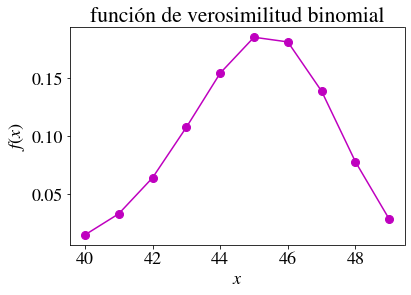

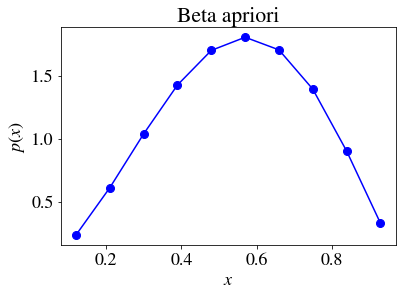

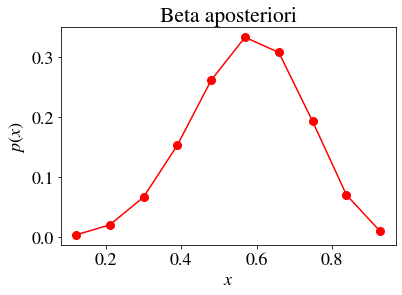

In [ ]:
from scipy.stats import beta # Distribución Beta
from scipy.stats import binom # Distribución Binomial
from matplotlib import pyplot
import numpy as np
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

n, p = 50, 0.9
media_bin, var_bin, sesgo_bin, kurt_bin = binom.stats(n, p, moments='mvsk')
x1 = np.arange(binom.ppf(0.01, n, p), binom.ppf(1, n, p))

a, b = 3, 2.5
media_beta, var_beta, sesgo_beta, kurt_beta = beta.stats(a, b, moments='mvsk')
x2 = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 10)

bin_ver = binom.pmf(x1, n, p)
beta_apriori = beta.pdf(x2, a, b)
beta_aposteriori = beta_apriori*bin_ver

pyplot.plot(x1, bin_ver, '-mo', ms=8, label = r'$n$ = {:.1f}, $m$ = {:.1f}'.format(n, p))
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')
pyplot.title('función de verosimilitud binomial')
pyplot.figure()
pyplot.plot(x2, beta_apriori, '-bo', ms=8, label = r'$\alpha$ = {:.1f}, $\beta$ = {:.1f}'.format(a, b))
pyplot.xlabel('$x$')
pyplot.ylabel('$p(x)$')
pyplot.title('Beta apriori')
pyplot.figure()
pyplot.plot(x2, beta_aposteriori, '-ro', ms=8, label = r'$\alpha$ = {:.1f}, $\beta$ = {:.1f} y n = {:.1f}'.format(a, b, n))
pyplot.xlabel('$x$')
pyplot.ylabel('$p(x)$')
pyplot.title('Beta aposteriori')
pyplot.show()

Media = 92.31
Varianza = 740.83
Sesgo = -0.31
Kurtosis = -0.51


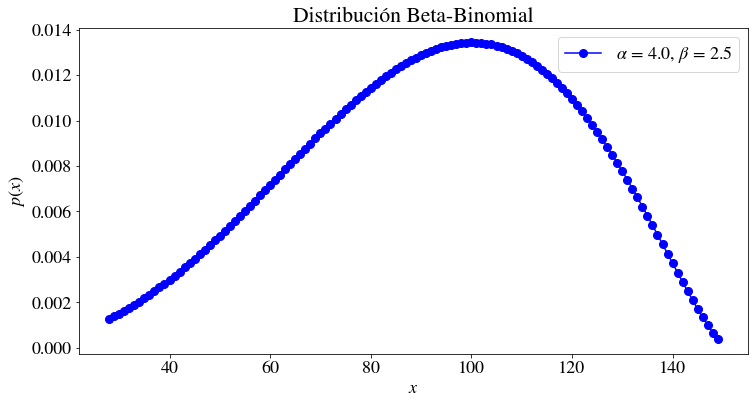

Media = 105.88
Varianza = 519.58
Sesgo = -0.53
Kurtosis = -0.14


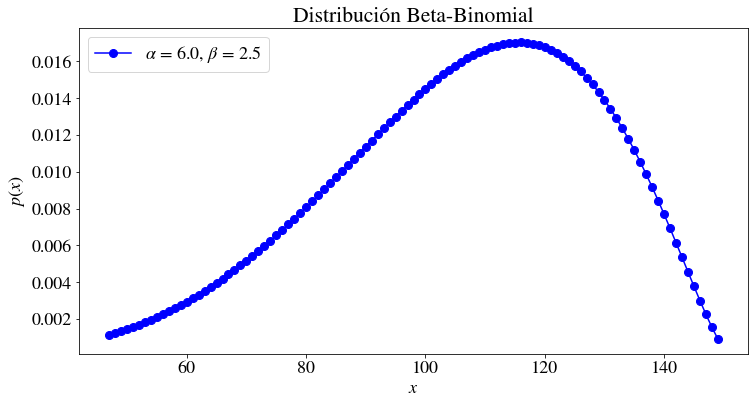

Media = 88.24
Varianza = 606.17
Sesgo = -0.21
Kurtosis = -0.46


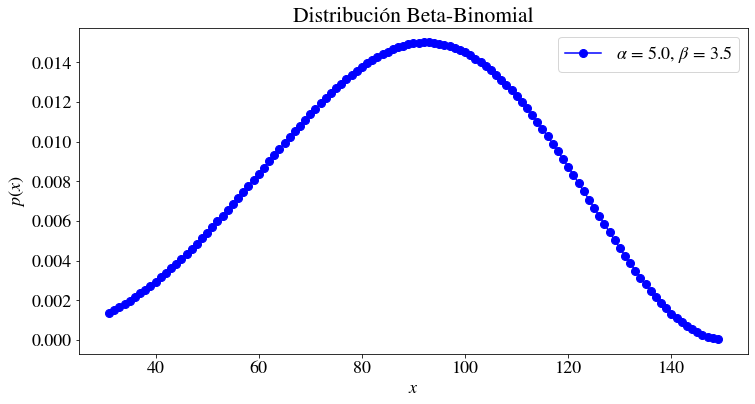

In [ ]:
from scipy.stats import betabinom # Distribución beta - binomial
from matplotlib import pyplot
import numpy as np
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

Parametros = ((4, 2.5), (6, 2.5), (5, 3.5))
n = 150

for a, b in Parametros:
  fig = pyplot.figure(figsize=(12,6)) 
  media, varianza, sesgo, kurtosis = betabinom.stats(n, a, b, moments = 'mvsk')
  print("Media = {:.2f}".format(media))
  print("Varianza = {:.2f}".format(varianza))
  print("Sesgo = {:.2f}".format(sesgo))
  print("Kurtosis = {:.2f}".format(kurtosis))
  x = np.arange(betabinom.ppf(0.01, n, a, b), betabinom.ppf(1, n, a, b)) # valores de x que son cálculados a partir de la función de puntos percentiles.
  pyplot.plot(x, betabinom.pmf(x, n, a, b), '-bo', ms=8, label = r'$\alpha$ = {:.1f}, $\beta$ = {:.1f}'.format(a, b))
  pyplot.xlabel('$x$')
  pyplot.ylabel('$p(x)$')
  pyplot.title('Distribución Beta-Binomial')
  pyplot.legend()
  pyplot.show()

# Estimador Bayesiano

El estimador Bayesiano considera los parámetros como variables aleatorias en lugar de suponer constantes desconocidas. Los parámetros son funciones de densidad de probabilidad y se pueden incorporar cualquier conocimiento previo para estimar la media y la varianza. Analizando desde el punto de vista Bayesiano, se puede utilizar pequeños conjuntos de datos y estimar con el menor margen de error cuando hay nuevos conjuntos de datos.

*Por ejemplo*, consideremos la probabilidad de lanzar una moneda y estimar la probabilidad que caiga cara. Entonces, si estimamos el número de caras observadas divididas por el número de lanzamientos:

$$p(cara) = \frac{N_{caras}}{N_{Lanzamientos}}$$

Al lanzar 3 veces la moneda y si en las tres veces siempre cae cara y no cruz, se puede deducir que la máxima verosimilitud es 1, lo cual la moneda siempre caera cara. Para evitar este tipo de escenario, se debe **regularizar la probabilidad** para que el modelo se adapte a una pequeña cantidad de datos. Lo anterior permite establecer una función de verosimilitud dado por:

$$p(x\vert cara) = cara^{N_{caras}}(1 - cara)^{N_{cruz}}$$

Si evaluamos la probablidad $p(cara \vert x)$ usando la regla de Bayes, se puede determinar que:

$$p(cara \vert x) = \frac{p(x\vert cara)\cdot p(cara)}{p(x)}$$

donde $p(cara)$ es una función de probabilidad apriori que se asume como un conocimiento previo.

Veamos el anterior ejemplo aplicado en Python:

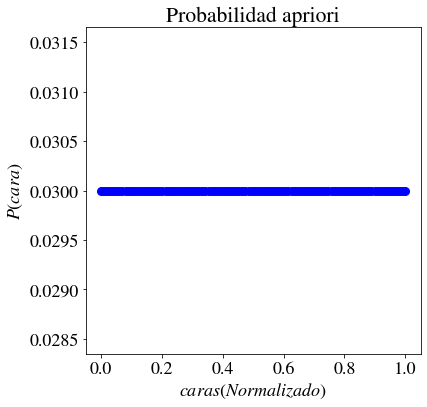

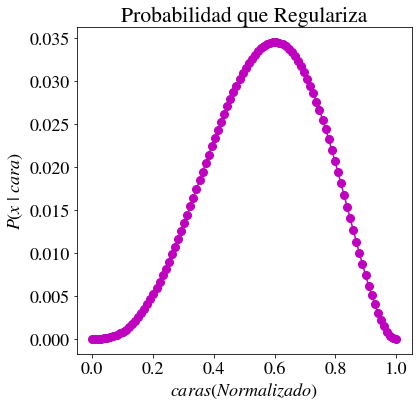

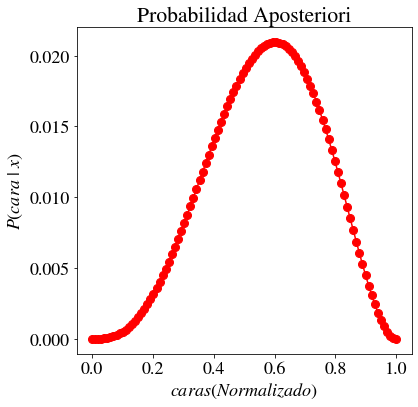

In [ ]:
from matplotlib import pyplot
import numpy as np
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

N_caras = 3
N_lanzamientos = 100
N_cruz = 2
P_cara = N_caras/N_lanzamientos
cara = np.linspace(0,1,100)
P_x_cara = (cara**N_caras)*(1 - cara)**N_cruz
P_x = np.sum(P_x_cara*P_cara)
P_cara_x = (P_x_cara*P_cara)/P_x

pyplot.figure(figsize=(6,6))
pyplot.plot(cara, np.ones([cara.shape[0],1])*P_cara, '-bo', ms=8)
pyplot.xlabel('$caras (Normalizado)$')
pyplot.ylabel('$P(cara)$')
pyplot.title('Probabilidad apriori')

pyplot.figure(figsize=(6,6))
pyplot.plot(cara, P_x_cara, '-mo', ms=8)
pyplot.xlabel('$caras (Normalizado)$')
pyplot.ylabel('$P(x\,\,|\,\,cara)$')
pyplot.title('Probabilidad que Regulariza')

pyplot.figure(figsize=(6,6))
pyplot.plot(cara, P_cara_x, '-ro', ms=8)
pyplot.xlabel('$caras (Normalizado)$')
pyplot.ylabel('$P(cara\,\,|\,\,x)$')
pyplot.title('Probabilidad Aposteriori')
pyplot.show()

Si cambiamos la probabilidad uniforme para calcular $P(cara)$ por una Gaussiana apriori, entonces la simulacion nos generará el siguiente resultado en Python:

In [ ]:
def Gaussians(X, Media, Varianza):
    return ((1. / np.sqrt(2 * np.pi * Varianza)) * np.exp(-(X - Media)**2 / (2 * Varianza)))

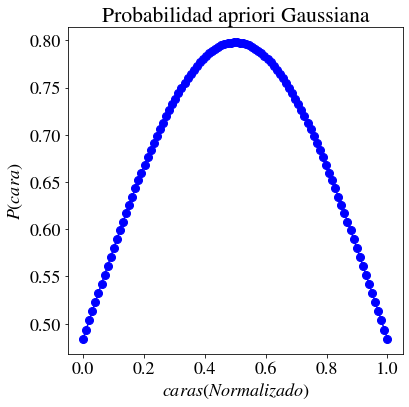

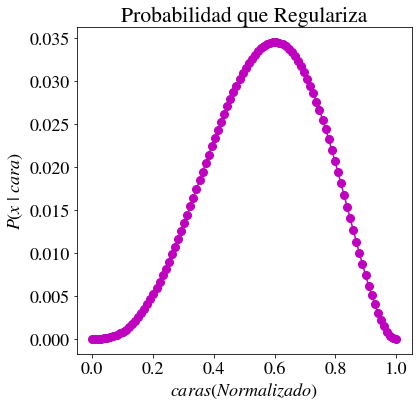

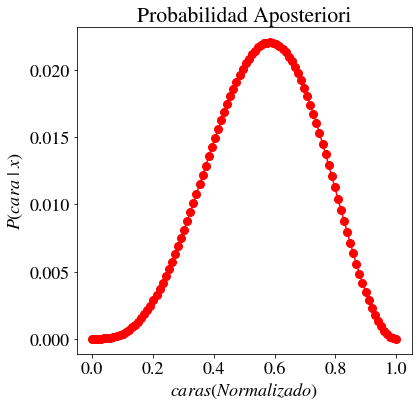

In [ ]:
from matplotlib import pyplot
import numpy as np
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

N_caras = 3
N_lanzamientos = 100
N_cruz = 2
cara = np.linspace(0,1,100)
media_0 = 0.5
Varianza_0 = 0.25
P_cara_1 = Gaussians(cara, media_0, Varianza_0)
P_x_cara_1 = (cara**N_caras)*(1 - cara)**N_cruz
P_x_1 = np.sum(P_x_cara_1*P_cara_1)
P_cara_x_1 = (P_x_cara_1*P_cara_1)/P_x_1

pyplot.figure(figsize=(6,6))
pyplot.plot(cara, P_cara_1, '-bo', ms=8)
pyplot.xlabel('$caras (Normalizado)$')
pyplot.ylabel('$P(cara)$')
pyplot.title('Probabilidad apriori Gaussiana')

pyplot.figure(figsize=(6,6))
pyplot.plot(cara, P_x_cara_1, '-mo', ms=8)
pyplot.xlabel('$caras (Normalizado)$')
pyplot.ylabel('$P(x\,\,|\,\,cara)$')
pyplot.title('Probabilidad que Regulariza')

pyplot.figure(figsize=(6,6))
pyplot.plot(cara, P_cara_x_1, '-ro', ms=8)
pyplot.xlabel('$caras (Normalizado)$')
pyplot.ylabel('$P(cara\,\,|\,\,x)$')
pyplot.title('Probabilidad Aposteriori')
pyplot.show()

Para ambos ejemplos, se utilizaron diferentes funciones de probabilidad apriori para estimar la probabilidad aposteriori, pero surge una interesante interrogante: ¿Cuál es la mejor estimación con menor margen de error?

Para encontrar una respuesta a esta inquietud, es necesario considerar la **estimación puntual**, que nos permitirá tomar la mejor decisión. Consideramos una función de costo o de pérdida, $L(T,\theta)$, donde $T$ es un estimador y $\theta$ es un estadístico (media, covarianza, etc) que se conoce. Si analizamos la diferencia entre $\theta$ y $T$, se puede calcular la pérdida de diferentes formas:

$$L(T,\theta)_1 = (T - \theta)^2$$

$$L(T,\theta)_2 = \vert T - \theta \vert$$

$$L(T,\theta)_3 = \begin{cases}0 & Si\,\, T = \theta\\
1 & Si\,\, T \neq \theta \end{cases}$$

$L(T,\theta)_1$ es la famosa **pérdida cuadrática** (lo van a utilizar bastante en Machine Learning); $L(T,\theta)_2$ es la **pérdida lineal absoluta**; y $L(T,\theta)_3$ es la **pérdida todo o nada**.

A partir de la funciones de pérdida, el *estimador Bayesiano* en realidad es una función que minimiza una pérdida entre $T$ y $\theta$ que nos ayudará a obtener la mejor estimación de una función de probabilidad apriori que genere la mejor decisión en la probabilidad aposteriori. Matemáticamente, se puede definir el estimador Bayesiano, $B$, como:

$$B = \min_{T} R(T)$$

donde $R(T)$ se denomina como el **riesgo de Bayes** o **pérdida esperada**, expresado como:

$$R(T) = \mathbb{E}\lbrack R(T,\theta)\rbrack = \int L(T,\theta)f(\theta)d\theta$$

siendo $f(\theta)$ una función de probabilidad apriori que se estime.

# Función de Distribución Gaussiana Multivariada

Cuando se tiene variables multialeatorias, se requiere conocer no solamente la propiedad de probabilidad de una simple variable aleatoria, sino además sus propiedades de la probabilidad conjunta. Para alcanzar este criterio, es necesario establecer una *distribución Gaussiana de n-dimensiones*. Veamos a continuación, una definición formal de la función de distribucuión Gaussiana multivariada:

**Definición:** Dado un vector aleatorio de N-dimensiones, $X = \lbrack x_1, \ldots, x_N \rbrack$ sujeto a una distribución Gaussiana de N-dimensiones,$X \sim N(\mu, \Sigma)$, con parámetros ($\mu$,$\Sigma$), la función de densidad de probabilidad se expresa como:

$$f(x\vert \mu, \Sigma) = \frac{1}{(2\pi)^\frac{D}{2}\vert\Sigma \vert^\frac{1}{2}} \exp \left \lbrack -\frac{1}{2}(x - \mu)^T \Sigma^{-1} (x - \mu)\right \rbrack$$

donde:

1.   $D$ es el número de dimensiones.
2.   $\mu$ es el vector de la media, donde la esperanza matemática es $E(X) = \mu$
3.   $ Cov(X) = \Sigma$ es la matriz de covarianza de los datos.

$$\Sigma = \begin{bmatrix} \sigma_{1,1} & \cdots &\sigma_{1,d} & \cdots & \sigma_{1,D}\\
\vdots & \ddots & \vdots & \cdots & \vdots\\
\sigma_{d,1} & \cdots &\sigma_{d,d} & \cdots & \sigma_{d,D}\\
\vdots & \ddots & \vdots & \cdots & \vdots\\
\sigma_{D,1} & \cdots &\sigma_{D,d} & \cdots & \sigma_{D,D}\\\end{bmatrix}_{DxD}$$

Siendo $\sigma_{d,d}$ la covarianza de una dimensión $d$ con respecto a otra dimensión $d$, considerando:

$$\sigma_{i,j} = E(X_i - \mu_i)(X_j - \mu_j) = E(X_i X_j) - \mu_i\mu_j$$

Y la varianza por cada muestra $X_i$:

$$\sigma_{i,i} = E(X_i - \mu_i)^2 = E(X_i^2) - \mu_i^2$$

4.   $\vert \cdot \vert$ es el operador determinante de la matriz.
5.   $\Sigma^{-1}$ es la pseudo-inversa de la matriz de covarianza de los datos.
6.   $\frac{1}{2}(x - \mu)^T \Sigma^{-1} (x - \mu)$ es una forma cuadrática.   

Para determinar la la función de densidad de probabilidad, se estima los dos parámetros $(\mu, \Sigma)$, el cual se expresa como:

$$\hat{\mu} = \frac{1}{N} \sum_{n=1}^N x_{n}$$
$$\Sigma = \sum_{n=1}^N (x_{n} - \hat{\mu})^T (x_{n} - \hat{\mu})$$

*NOTA:* La función de probabilidad Gaussiana de una dimensión se considera como un caso especial de la función de probabilidad Gaussiana multivariable.

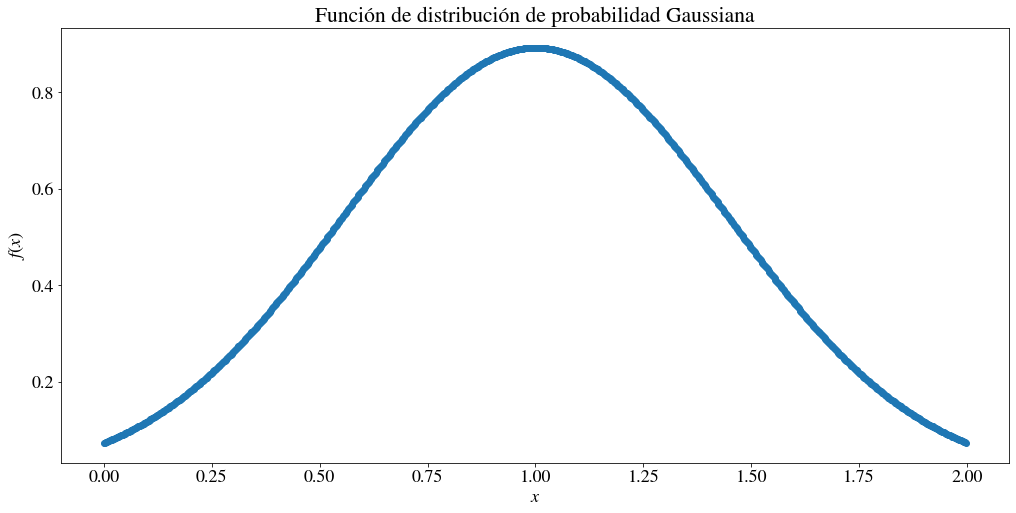

In [ ]:
from scipy.stats import multivariate_normal # Modelo de distribución gaussiana multivariable
from matplotlib import pyplot
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

x = np.linspace(0, 2, 1000, endpoint = False)
f = multivariate_normal.pdf(x, mean = 1, cov=0.2)

fig = pyplot.figure(figsize=(17,8))
pyplot.plot(x, f, '-o')
pyplot.xlabel('$x$') # Etiqueta del eje x
pyplot.ylabel('$f(x)$') # Etiqueta del eje y
pyplot.title('Función de distribución de probabilidad Gaussiana')
pyplot.show()

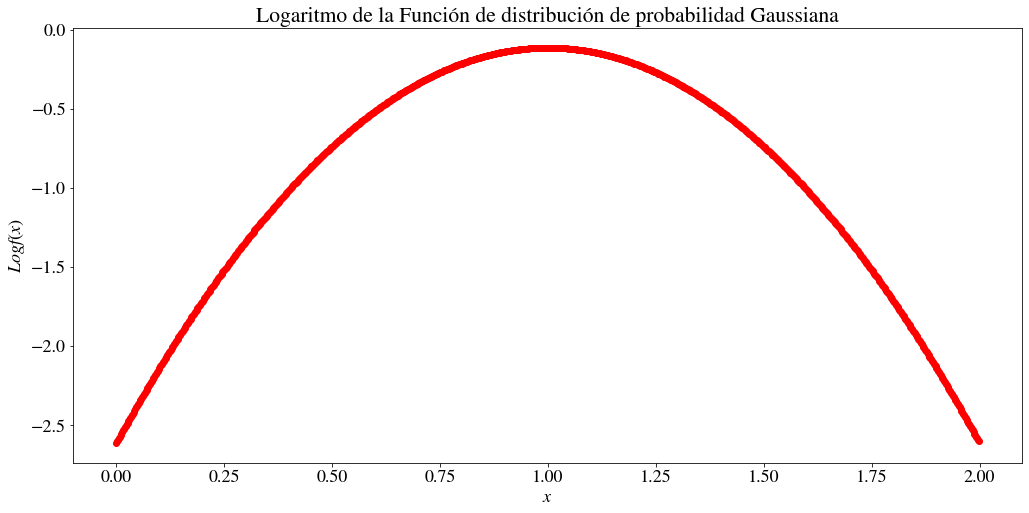

In [ ]:
from scipy.stats import multivariate_normal # Modelo de distribución gaussiana multivariable
from matplotlib import pyplot
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

x = np.linspace(0, 2, 1000, endpoint = False)
f = multivariate_normal.logpdf(x, mean = 1, cov=0.2)

fig = pyplot.figure(figsize=(17,8))
pyplot.plot(x, f, '-ro')
pyplot.xlabel('$x$') # Etiqueta del eje x
pyplot.ylabel('$Log f(x)$') # Etiqueta del eje y
pyplot.title('Logaritmo de la Función de distribución de probabilidad Gaussiana')
pyplot.show()

**Propiedades de la función Gaussiana Multivariada:**

*Propiedad 1:* 

Dado un vector de N-dimensiones,  $x = \lbrack x_1, \ldots, x_N \rbrack$, decimos que la función de distribución de $x$ es una función de distribución Gaussiana multivariada si y solo si una **combinación lineal**, $Y = \sum_n a_n x_n + b$ es una distribución Gaussiana de una dimensión, siendo $a_n$ y $b$ números reales y que no pueden ser iguales a 0:

*Propiedad 2:* 

Dado un vector de N-dimensiones,  $x = \lbrack x_1, \ldots, x_N \rbrack$, obtenemos una distribución Gaussiana de N-dimensiones, dado por:

$$Y_i = \sum_{j=1}^N a_{i,j}x_j; \,\,\, i=\lbrace 1,\ldots, r \rbrace, r \leq N$$

**Función de distribución Gaussiana multivariada para tareas de clasificación:** La anterior función se puede utilizar para realizar tareas de clasificación de datos. Para este caso, se debe considerar dos cambios en la ecuación original de la función:

1.   $D$ se considera como el número de clases o etiquetas.
2.   $x$ son las muestras que pertenecen a una clase o etiqueta.
3.   $K$ es una clase o etiqueta.

A partir de estos cambios, se define un pseudocódigo que permite aprovechar la función de probabilidad multivariada para tareas de clasificación:

**Entradas:** x, K

**Salida:** f

1.   Dividir el conjunto de datos en subconjuntos, donde cada subconjunto se etiqueta con una clase $K$, es decir, un valor entero desde 1 hasta $K$ clases. 
2.   Para cada subconjunto, calcular $\mu$.
3.   Para cada subconjunto, calcular $\Sigma$, considerando al menos uno de los tres casos:

*   *Matriz $\Sigma$ Completa:* los datos se agrupan en forma parabólica.
*   *Matriz $\Sigma$ Esférica:* los datos se agrupan de forma circular de acuerdo a los valores de la media, generando hiperesferas. Lo anterior genera un único valor de la varianza para todos los datos.
*   *Matriz $\Sigma$ Diagonal o Elípticas:* los datos se agrupan de forma elíptica, generando hiperelipsoides donde $\Sigma$ contiene valores distintos en su diagonal.

4.   Calcular la función $f(x\vert \mu, \Sigma)$ para cada subconjunto.

Para analizar el paso 3 del algoritmo, se muestra los siguientes ejemplos en Python, considerando la distribución marginal de algún subconjunto de elementos de la distribución Gaussiana multivariable, expresado como:

$$f(x,y) = \mathcal{N} \begin{pmatrix} \begin{bmatrix} \mu_x\\ \mu_y\end{bmatrix}, \begin{bmatrix} \Sigma_{x} & \Sigma_{xy} \\ \Sigma_{xy}^T & \Sigma_{y}\end{bmatrix} \end{pmatrix}$$



*Caso de la covarianza completa:*

$$f(x,y) = \mathcal{N} \begin{pmatrix} \begin{bmatrix} 0\\ 0\end{bmatrix}, \begin{bmatrix} 1 & -1 \\ -1 & 4\end{bmatrix} \end{pmatrix}$$

En este caso, los datos se agrupan en elipses en cualquier dirección o ángulo.

Text(0.5, 1.0, 'PDF con matriz de covarianza completa')

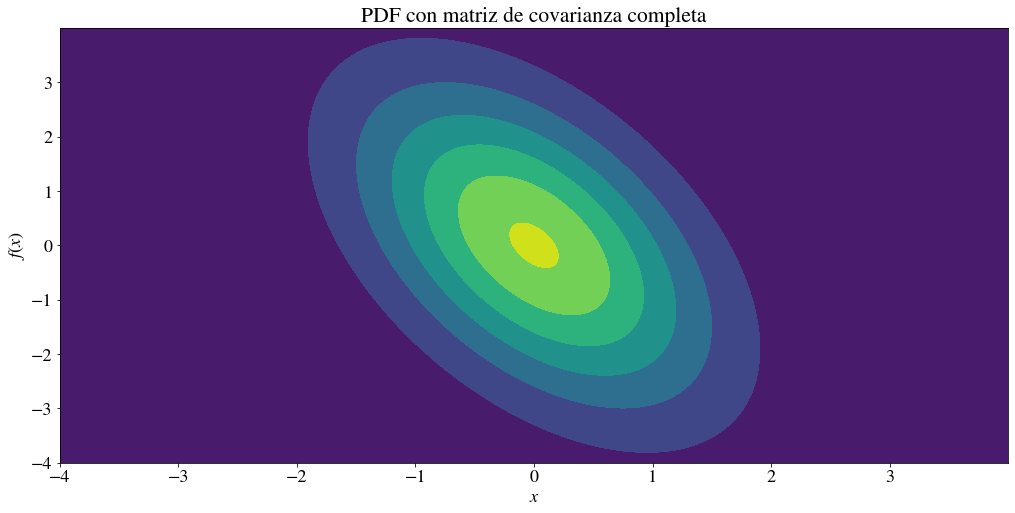

In [ ]:
# Matriz de covarianza completa:
import numpy as np
from scipy.stats import multivariate_normal # Modelo de distribución gaussiana multivariable
from matplotlib import pyplot
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

x, y = np.mgrid[-4:4:0.001, -4:4:0.001]
pos = np.dstack((x, y))
rv = multivariate_normal([0, 0], [[1, -1], [-1, 4]])
fig = pyplot.figure(figsize=(17,8))
ax2 = fig.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos))
pyplot.xlabel('$x$') # Etiqueta del eje x
pyplot.ylabel('$f(x)$') # Etiqueta del eje y
pyplot.title('PDF con matriz de covarianza completa')
pyplot.show()

*Caso de la covarianza diagonal:*

$$f(x,y) = \mathcal{N} \begin{pmatrix} \begin{bmatrix} 0\\ 0\end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 4\end{bmatrix} \end{pmatrix}$$

En este caso, los datos se agrupan en elipses en paralelo a un eje.

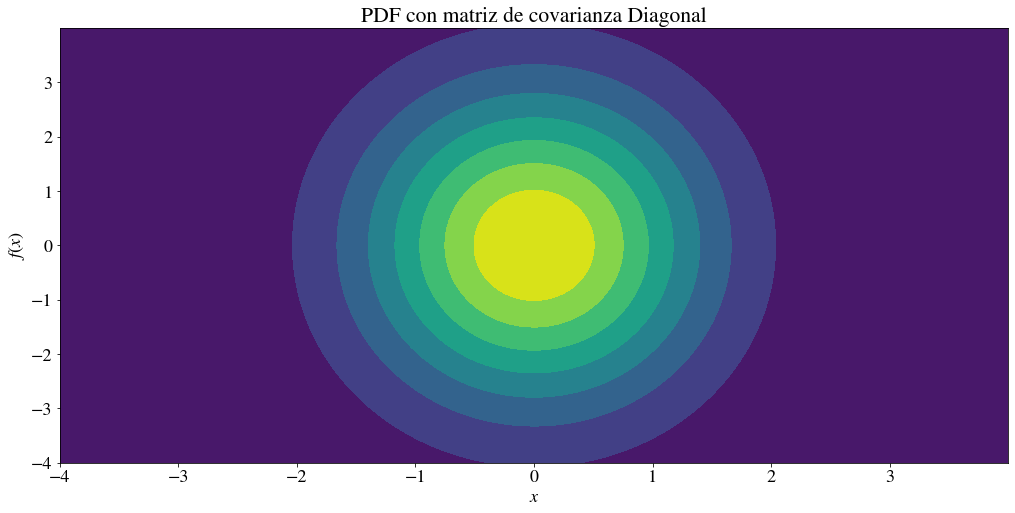

In [ ]:
# Matriz de covarianza diagonal:
import numpy as np
from scipy.stats import multivariate_normal # Modelo de distribución gaussiana multivariable
from matplotlib import pyplot
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

x, y = np.mgrid[-4:4:0.001, -4:4:0.001]
pos = np.dstack((x, y))
pyplot.figure(figsize=(17,8))
rv_2 = multivariate_normal([0, 0], [[1, 0], [0, 4]])
pyplot.contourf(x, y, rv_2.pdf(pos))
pyplot.xlabel('$x$') # Etiqueta del eje x
pyplot.ylabel('$f(x)$') # Etiqueta del eje y
pyplot.title('PDF con matriz de covarianza diagonal')
pyplot.show()

*Caso de la covarianza esférica:*

$$f(x,y) = \mathcal{N} \begin{pmatrix} \begin{bmatrix} 0\\ 0\end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix} \end{pmatrix}$$

En este caso, los datos se agrupan como un circulo perfecto.

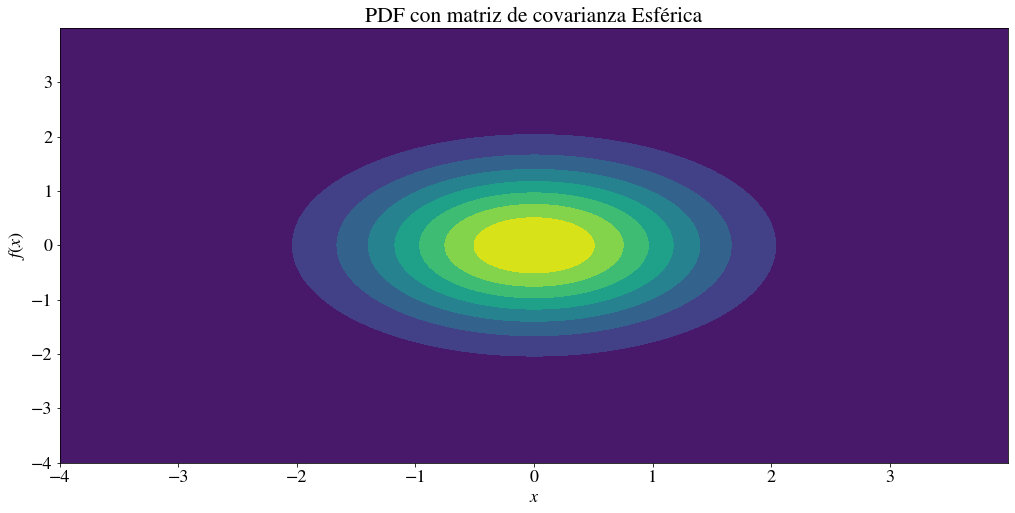

In [ ]:
# Matriz de covarianza esférica:
import numpy as np
from scipy.stats import multivariate_normal # Modelo de distribución gaussiana multivariable
from matplotlib import pyplot
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

x, y = np.mgrid[-4:4:0.001, -4:4:0.001]
pos = np.dstack((x, y))
pyplot.figure(figsize=(17,8))
rv_3 = multivariate_normal([0, 0], [[1, 0], [0, 1]])
pyplot.contourf(x, y, rv_3.pdf(pos))
pyplot.xlabel('$x$') # Etiqueta del eje x
pyplot.ylabel('$f(x)$') # Etiqueta del eje y
pyplot.title('PDF con matriz de covarianza esférica')
pyplot.show()

*¿Qué sucede con el vector de la media?*

$$f(x,y) = \mathcal{N} \begin{pmatrix} \begin{bmatrix} 0.5\\ 0.5\end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix} \end{pmatrix}$$

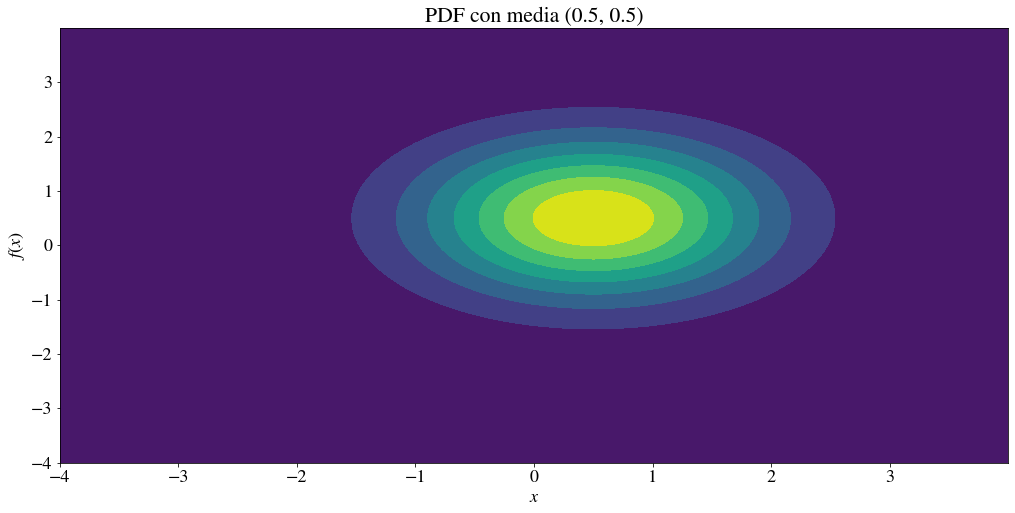

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal # Modelo de distribución gaussiana multivariable
from matplotlib import pyplot
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

x, y = np.mgrid[-4:4:0.001, -4:4:0.001]
pos = np.dstack((x, y))
pyplot.figure(figsize=(17,8))
rv_4 = multivariate_normal([0.5, 0.5], [[1, 0], [0, 1]])
pyplot.contourf(x, y, rv_4.pdf(pos))
pyplot.xlabel('$x$') # Etiqueta del eje x
pyplot.ylabel('$f(x)$') # Etiqueta del eje y
pyplot.title('PDF con media (0.5, 0.5)')
pyplot.show()


$$f(x,y) = \mathcal{N} \begin{pmatrix} \begin{bmatrix} 0.5\\ -0.5\end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix} \end{pmatrix}$$

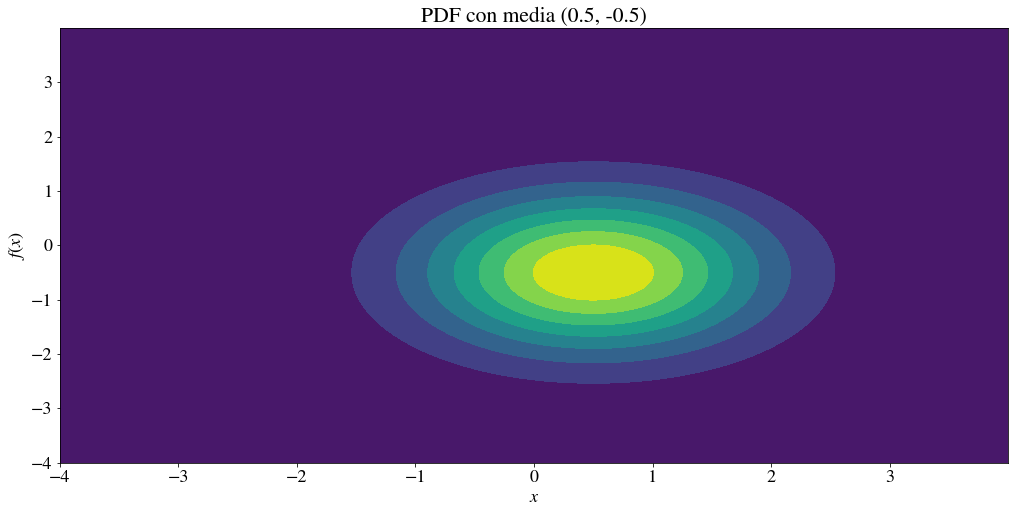

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal # Modelo de distribución gaussiana multivariable
from matplotlib import pyplot
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

x, y = np.mgrid[-4:4:0.001, -4:4:0.001]
pos = np.dstack((x, y))
pyplot.figure(figsize=(17,8))
rv_5 = multivariate_normal([0.5, -0.5], [[1, 0], [0, 1]])
pyplot.contourf(x, y, rv_5.pdf(pos))
pyplot.xlabel('$x$') # Etiqueta del eje x
pyplot.ylabel('$f(x)$') # Etiqueta del eje y
pyplot.title('PDF con media (0.5, -0.5)')
pyplot.show()


$$f(x,y) = \mathcal{N} \begin{pmatrix} \begin{bmatrix} -0.5\\ -0.5\end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix} \end{pmatrix}$$

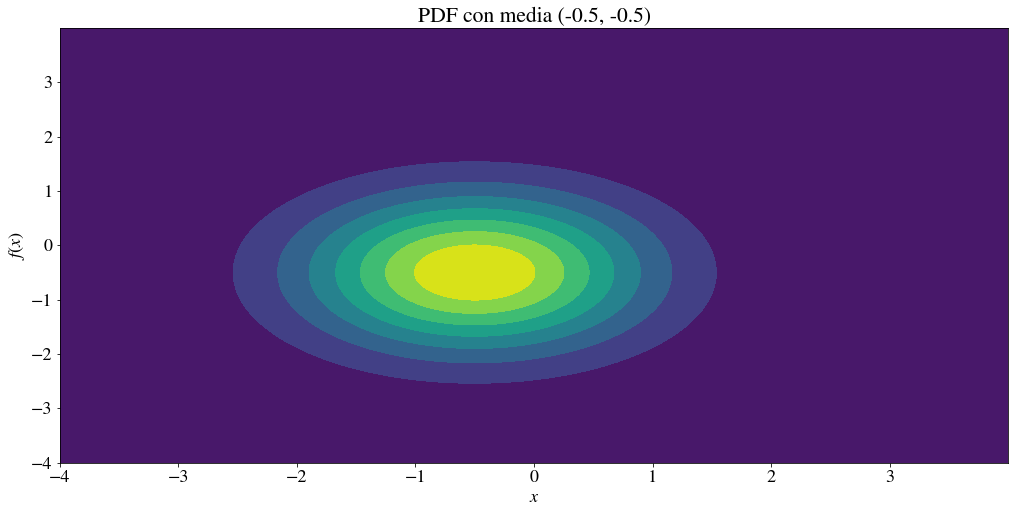

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal # Modelo de distribución gaussiana multivariable
from matplotlib import pyplot
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

x, y = np.mgrid[-4:4:0.001, -4:4:0.001]
pos = np.dstack((x, y))
pyplot.figure(figsize=(17,8))
rv_6 = multivariate_normal([-0.5, -0.5], [[1, 0], [0, 1]])
pyplot.contourf(x, y, rv_6.pdf(pos))
pyplot.xlabel('$x$') # Etiqueta del eje x
pyplot.ylabel('$y$') # Etiqueta del eje y
pyplot.title('PDF con media (-0.5, -0.5)')
pyplot.show()

**Ejemplo de la función de distribución gaussiana multivariable para clasificación**

Caso 1: Si f1 < f2

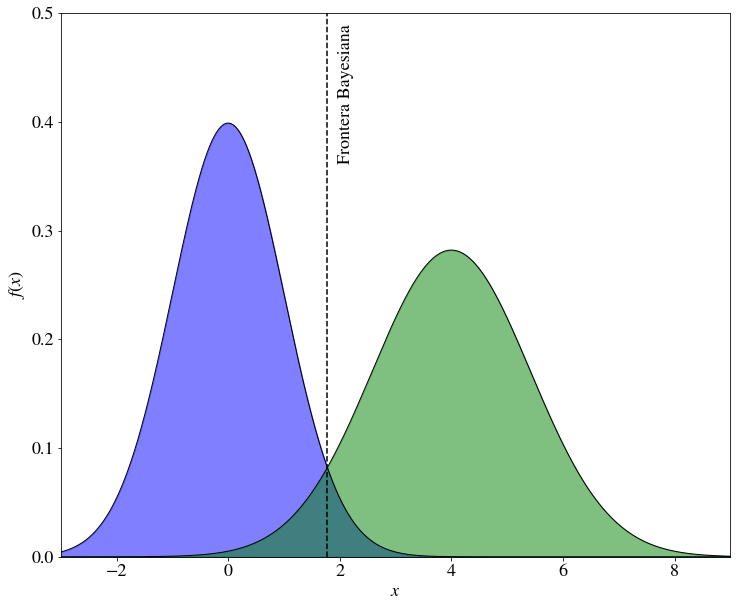

In [ ]:
import numpy as np 
from matplotlib import pyplot
from scipy.stats import multivariate_normal

X = np.linspace(-3, 9, 2000)
f1 = multivariate_normal.pdf(X, mean = 0, cov = 1)
f2 = multivariate_normal.pdf(X, mean = 4, cov = 2)

# Se obtiene la frontera de decisión
Frontera_Bayesiana = X[np.where(f1 < f2)][0]
# np.where regresa los elementos elegidos desde x o y dependiendo de la condición.
# La condición es F1 < F2

fig = pyplot.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
ax.plot(X, f1, '-k', lw = 1) # Graficar la función de densidad de probabilidad Gaussiana 1
ax.fill_between(X, f1, color='blue', alpha=0.5) # Rellena con un color el área bajo la curva de una función
ax.plot(X, f2, '-k', lw=1) # Graficar la función de densidad de probabilidad Gaussiana 2
ax.fill_between(X, f2, color='green', alpha=0.5) # Rellena con un color el área bajo la curva de una función
ax.set_xlim(-3, 9)
ax.set_ylim(0, 0.5)

ax.set_xlabel('$x$') # Etiqueta x
ax.set_ylabel('$f(x)$') # Etiqueta de la función de densidad de probabilidad

# Graficar frontera Bayesiana
ax.plot([Frontera_Bayesiana, Frontera_Bayesiana], [0, 0.5], '--k') # Cuando f1 y f2 son iguales, se establece la frontera de decisión
ax.text(Frontera_Bayesiana + 0.2, 0.49, "Frontera Bayesiana", ha='left', va='top', rotation = 90)

pyplot.show() # Mostrar gráfica

Caso 2: Si f1 > f2

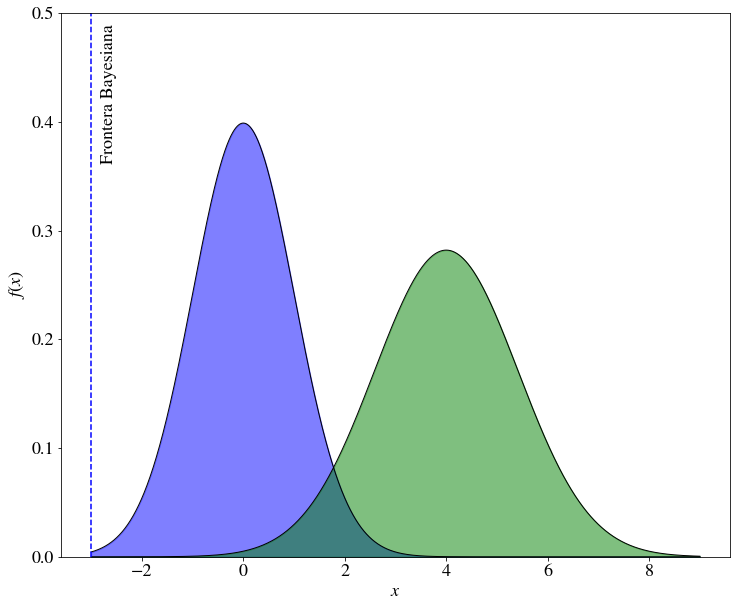

In [ ]:
import numpy as np 
from matplotlib import pyplot
from scipy.stats import multivariate_normal

X = np.linspace(-3, 9, 2000)
f1 = multivariate_normal.pdf(X, mean = 0, cov = 1)
f2 = multivariate_normal.pdf(X, mean = 4, cov = 2)

# Se obtiene la frontera de decisión
Frontera_Bayesiana = X[np.where(f1 > f2)][0]
# np.where regresa los elementos elegidos desde x o y dependiendo de la condición.
# La condición es F1 > F2

fig = pyplot.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
ax.plot(X, f1, '-k', lw = 1) # Graficar la función de densidad de probabilidad Gaussiana 1
ax.fill_between(X, f1, color='blue', alpha=0.5) # Rellena con un color el área bajo la curva de una función
ax.plot(X, f2, '-k', lw=1) # Graficar la función de densidad de probabilidad Gaussiana 2
ax.fill_between(X, f2, color='green', alpha=0.5) # Rellena con un color el área bajo la curva de una función
ax.set_ylim(0, 0.5)

ax.set_xlabel('$x$') # Etiqueta x
ax.set_ylabel('$f(x)$') # Etiqueta de la función de densidad de probabilidad

# Graficar frontera Bayesiana
ax.plot([Frontera_Bayesiana, Frontera_Bayesiana], [0, 0.5], '--b') 
ax.text(Frontera_Bayesiana + 0.2, 0.49, "Frontera Bayesiana", ha='left', va='top', rotation = 90)

pyplot.show() # Mostrar gráfica

Caso 3: cuando la media y covarianza de f2 es mayor a f1

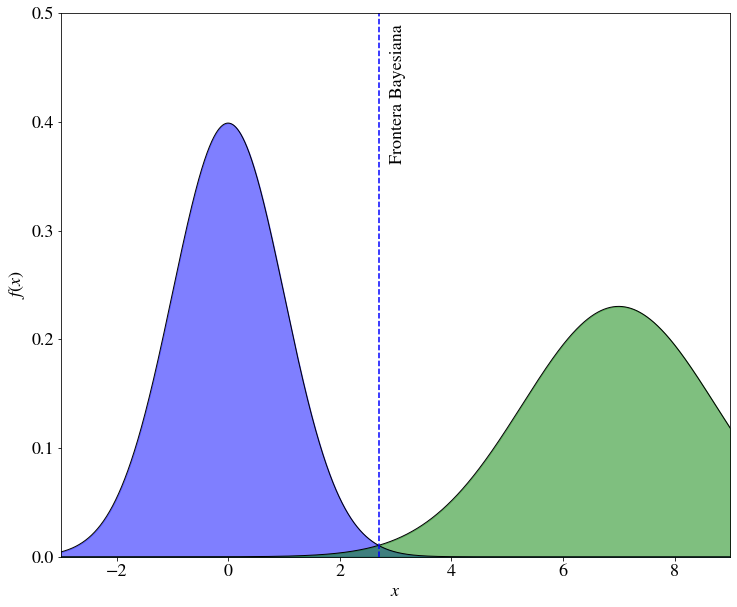

In [ ]:
import numpy as np 
from matplotlib import pyplot
from scipy.stats import multivariate_normal

X = np.linspace(-3, 9, 2000)
f1 = multivariate_normal.pdf(X, mean = 0, cov = 1)
f2 = multivariate_normal.pdf(X, mean = 7, cov = 3)

# Se obtiene la frontera de decisión
Frontera_Bayesiana = X[np.where(f1 < f2)][0]
# np.where regresa los elementos elegidos desde x o y dependiendo de la condición.
# La condición es F1 < F2

fig = pyplot.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
ax.plot(X, f1, '-k', lw = 1) # Graficar la función de densidad de probabilidad Gaussiana 1
ax.fill_between(X, f1, color='blue', alpha=0.5) # Rellena con un color el área bajo la curva de una función
ax.plot(X, f2, '-k', lw=1) # Graficar la función de densidad de probabilidad Gaussiana 2
ax.fill_between(X, f2, color='green', alpha=0.5) # Rellena con un color el área bajo la curva de una función
ax.set_ylim(0, 0.5)
ax.set_xlim(-3, 9)

ax.set_xlabel('$x$') # Etiqueta x
ax.set_ylabel('$f(x)$') # Etiqueta de la función de densidad de probabilidad

# Graficar frontera Bayesiana
ax.plot([Frontera_Bayesiana, Frontera_Bayesiana], [0, 0.5], '--b') 
ax.text(Frontera_Bayesiana + 0.2, 0.49, "Frontera Bayesiana", ha='left', va='top', rotation = 90)

pyplot.show() # Mostrar gráfica

**Clasificación de las funciones Gaussianas Multivariadas en 2D**

In [ ]:
# Obtenido desde https://matplotlib.org/gallery/statistics/confidence_ellipse.html#sphx-glr-gallery-statistics-confidence-ellipse-py

def get_correlated_dataset(n, dependency, mu, scale):
    latent = np.random.randn(n, 2)
    dependent = latent.dot(dependency)
    scaled = dependent * scale
    scaled_with_offset = scaled + mu
    # return x and y of the new, correlated dataset
    return scaled_with_offset[:, 0], scaled_with_offset[:, 1]

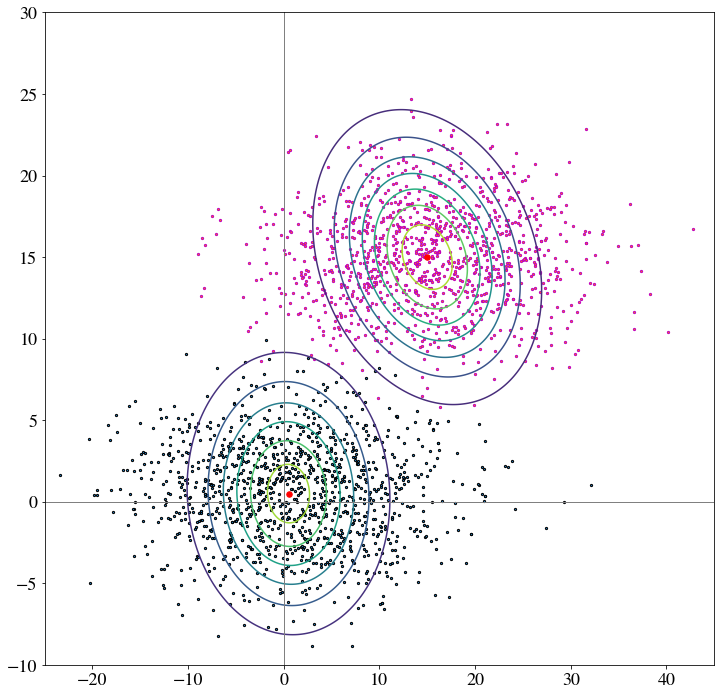

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal # Modelo de distribución gaussiana multivariable
from matplotlib import pyplot
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig, ax =  pyplot.subplots(figsize=(12,12))
ax.axvline(c='grey', lw=1)
ax.axhline(c='grey', lw=1)

dependency_1 = np.array([[1, 0],[0, 1]])
dependency_2 = np.array([[1, 0],[0, 1]])
media_1 = 0.5, 0.5
media_2 = 15, 15
scale = 8, -3
n = 1200

x_1, y_1 = get_correlated_dataset(n, dependency_1, media_1, scale)
x_2, y_2 = get_correlated_dataset(n, dependency_2, media_2, scale)

ax.scatter(x_1, y_1, s = 5, edgecolor='k')
ax.scatter(x_2, y_2, s = 5, edgecolor='m')
ax.scatter(media_1[0], media_1[1], c='red', s=30)
ax.scatter(media_2[0], media_2[1], c='red', s=30)

F1 = multivariate_normal(media_1, [[30, 4],[-1, 20]])
F2 = multivariate_normal(media_2, [[35, 4],[-6, 20]])
X, Y = np.meshgrid(np.arange(-20, 20, 0.1),np.arange(-20, 20, 0.1))
XX, YY = np.meshgrid(np.arange(-40, 40, 0.1),np.arange(-40, 40, 0.1))
pos = np.dstack((X, Y))
pyplot.contour(X, Y, F1.pdf(pos))
pos_2 = np.dstack((XX, YY))
pyplot.contour(XX, YY, F2.pdf(pos_2))
ax.set_ylim(-10, 30)
ax.set_xlim(-25, 45)
pyplot.show()

# Análisis Discriminante Lineal

**Distribución de Gaussiana estándar de dos dimensiones o bivariada:**

Dado un vector de N-dimensiones, $x = \lbrack x_1, \ldots, x_N \rbrack$, se define una función de distribución Gaussiana de dos dimensiones cuyos parámetros son ($\mu_1$, $\mu_2$, $\sigma_1$, $\sigma_2$, $r$), el cual su función de densidad de probabilidad esta dado por:

$$f(x_1, x_2) = \frac{1}{2\pi \sigma_1 \sigma_2} exp \left \lbrace - \frac{1}{2(1 - r^2)} \left \lbrack \frac{(x_1 - \mu_1)^2}{\sigma_1^2} - \frac{2r(x_1 - \mu_1)(x_2 - \mu_2)}{\sigma_1 \sigma_2} + \frac{(x_2 - \mu_2)^2}{\sigma_2^2}  \right \rbrack\right \rbrace$$

donde $\sigma_1 , \sigma_2 > 0$ y $\vert r \vert \leq 1$. Si $r = 0$, $\mu_1 = \mu_2 = 0$ y $\sigma_1 = \sigma_2 = 1$, se obtiene dos distribuciones marginales dados por las siguientes funciones de densidad de probabilidad:

$$f(x_1) = \frac{1}{\sqrt{2\pi}\sigma_1}\exp \left \lbrack - \frac{(x_1 - \mu_1)^2}{2\sigma_1^2} \right \rbrack$$

$$f(x_2) = \frac{1}{\sqrt{2\pi}\sigma_2}\exp \left \lbrack - \frac{(x_2 - \mu_2)^2}{2\sigma_2^2} \right \rbrack$$

**Análisis Discriminante:** Es una técnica que busca las mejores fronteras de decisión de acuerdo a una regla de clasificación de datos. Por lo general, el análisis discriminante estima las probabilidades posteriores de la pertenencia a una clase o etiqueta, es decir, cuál es la probabilidad de una muestra de los datos, $x_n = \lbrace x_{1,1}, \ldots, x_{n,d}, \ldots, x_{n,D} \rbrace$, pertenecen a una clase o etiqueta, $K$, donde $K = \lbrace 0, 1, 2, ...\rbrace$.

NOTA: $D$ es considerado como el número de dimensiones de los datos. Se utilizará para facilitar la explicación.

Para establecer dicha probabilidad, se considera el *teorema de Bayes para clasificación*. En este caso, definimos:

$$Pr(Y = k \vert X = x) = \frac{\omega_k f_k(x)}{\sum_{i = 1}^K \omega_i f_i(x)}$$

donde $f_k(X) \equiv Pr(X = x \vert Y = k)$ es la función de densidad de $x$ para una muestra u observación que pertenece a una variable respuesta $Y$ con una clase o etiqueta $k$; y $\omega_k$ es la probabilidad prior que es elegido aleatoriamente desde las clases o etiquetas $k$. Una forma práctica de calcular $\omega_k$, es la siguiente:

$$\omega_k = \frac{N_k}{N}$$

siendo $N_k$ el número de muestras que pertenecen a una clase $k$ y $N$ es el número de datos de entrenamiento para crear el modelo LDA.

A partir de lo anterior, vamos a explicar el análisis discriminate de una sola frontera o predictor.

Supongamos que $f_k(x)$ es una función Gaussiana tal que la función de densidad de probabilidad está dado por:

$$f_k(x) = \frac{1}{\sqrt{2\pi}\sigma_k}\exp \left \lbrack - \frac{(x - \mu_k)^2}{2\sigma_k^2} \right \rbrack$$

donde $\mu_k$ y $\sigma_k^2$ son los parámetros de media y la varianza por cada clase $k$. Considerando el teorema de Bayes para clasificación, reemplazamos $f_k(x)$:

$$p_k(x) = \frac{\omega_k \frac{1}{\sqrt{2\pi}\sigma_k}\exp \left \lbrack - \frac{(x - \mu_k)^2}{2\sigma_k^2} \right \rbrack}{\sum_{i = 1}^K \omega_i \frac{1}{\sqrt{2\pi}\sigma_i}\exp \left \lbrack - \frac{(x - \mu_i)^2}{2\sigma_i^2} \right \rbrack}$$

donde $p_k(x)$ es la probabilidad posterior que se le asigna a cada muestra con respecto a cada clase $k$. Si se aplica el logarítmo de $p_k(x)$ y organizando los términos de la función, se establece la *función discriminante*, $\delta_k (x)$, que es una función lineal de $x$:

$$ \delta_k(x) = x \left (\frac{\mu_k}{\sigma_k^2} \right) - \frac{\mu_k^2}{2\sigma_k^2} + log(\omega_k) $$

donde $\mu_k$ y $\sigma_k^2$ se calculan como:

$$\mu_k = \frac{1}{N_K} \sum_{i: y_i = k} x_i$$

$$\sigma_k^2 = \frac{1}{N - K} \sum_{k=1}^K \sum_{i: y_i = k} (x_i - \mu_k)^2$$

Veamos un ejemplo de clasificación de dos clases usando LDA con un solo predictor:

In [ ]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_breast_cancer # Datos a clasificar
from sklearn.model_selection import train_test_split # Esta clase realiza la partición de datos en entrenamiento y prueba

data = load_breast_cancer()
X = data.data 
Y = data.target
X = X[:,0:2] # Se selecciona dos características para el ejemplo
display(X)
print('Número de muestras = ', X.shape[0])
print('Número de dimensiones = ', X.shape[1])
display(Y)

X_Entrenamiento, X_Prueba, Y_Entrenamiento, Y_Prueba = train_test_split(X, Y, test_size = 0.2, random_state = 17)

print('Tamaño de los datos de entrenamiento: ', X_Entrenamiento.shape)
print('Tamaño de los datos de prueba: ', X_Prueba.shape)
print('Tamaño del vector de clases de entrenamiento: ', Y_Entrenamiento.shape)
print('Tamaño del vector de clases de prueba: ', Y_Prueba.shape)

array([[17.99, 10.38],
       [20.57, 17.77],
       [19.69, 21.25],
       ...,
       [16.6 , 28.08],
       [20.6 , 29.33],
       [ 7.76, 24.54]])

Número de muestras =  569
Número de dimensiones =  2


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

Tamaño de los datos de entrenamiento:  (455, 2)
Tamaño de los datos de prueba:  (114, 2)
Tamaño del vector de clases de entrenamiento:  (455,)
Tamaño del vector de clases de prueba:  (114,)


In [ ]:
LDA = LinearDiscriminantAnalysis(solver = 'lsqr', store_covariance = True, tol = 1e-4) #lsqr = Least squares solution
LDA.fit(X_Entrenamiento, Y_Entrenamiento)
print("Matriz de covarianza entre características: ", LDA.covariance_)
print("Tamaño de la matriz de covarianza entre características:", LDA.covariance_.shape)
print("Probabilidades prior por cada clase:", LDA.priors_)
print("Valor del intercepto de la función lineal de las clases (b): ", LDA.intercept_)

Matriz de covarianza entre características:  [[ 5.8849609   0.38646367]
 [ 0.38646367 15.6968066 ]]
Tamaño de la matriz de covarianza entre características: (2, 2)
Probabilidades prior por cada clase: [0.38241758 0.61758242]
Valor del intercepto de la función lineal de las clases (b):  [17.55885048]


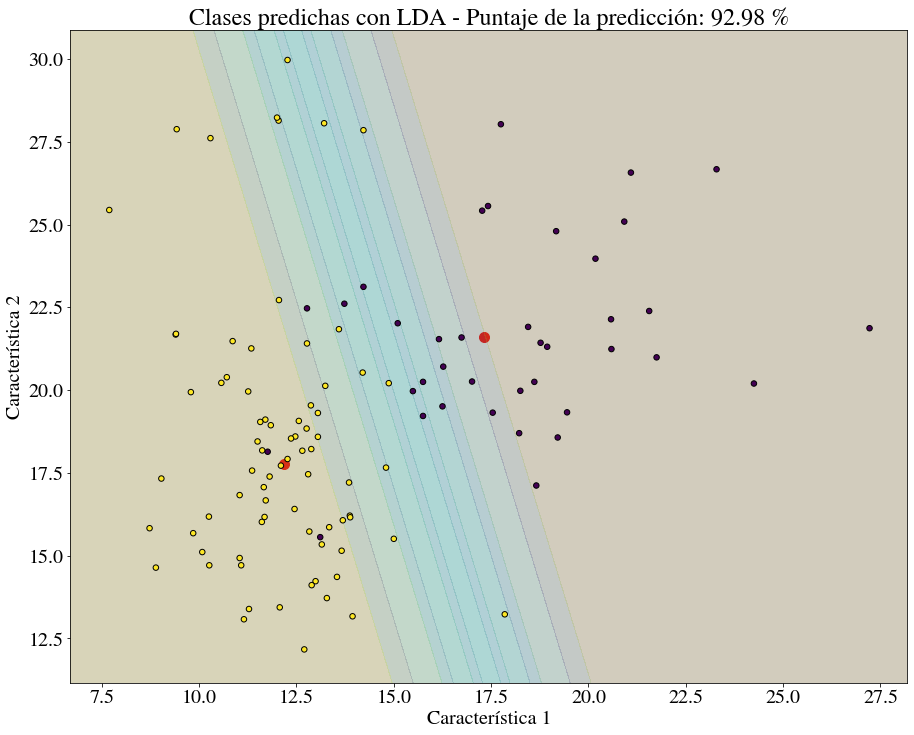

In [ ]:
from matplotlib import pyplot
import matplotlib

matplotlib.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

x_min, x_max = X_Prueba[:, 0].min() - 1, X_Prueba[:, 0].max() + 1 # Valores máximos y mínimos de la característica 1
xx_min, xx_max = X_Prueba[:, 1].min() - 1, X_Prueba[:, 1].max() + 1 # Valores máximos y mínimos de la característica 2
x1, x2 = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(xx_min, xx_max, 0.1)) 
# np.meshgrid regresa las coordenadas de forma matricial desde dos coordenadas x e y vectorial.

Salida_2 = LDA.predict_proba(np.c_[x1.ravel(), x2.ravel()]) # Se aplica la predición a partir del modelo LDA, calculando las probabilidades de cada muestra con respecto a cada clase
Salida_21 = Salida_2[:,0].reshape(x1.shape) # Organizando las probabilidades de la clase 0
Salida_22 = Salida_2[:,1].reshape(x1.shape) # Organizando las probabilidades de la clase 1

MEDIAS = LDA.means_ # Cálculo de las medias de cada clase con respecto a cada característica

pyplot.subplots(figsize=(15,12))
pyplot.scatter(MEDIAS[0,0], MEDIAS[0,1], c='red', s=100)
pyplot.scatter(MEDIAS[1,0], MEDIAS[1,1], c='red', s=100)
pyplot.contourf(x1, x2, Salida_21, alpha=0.2)
pyplot.contourf(x1, x2, Salida_22, alpha=0.2)
pyplot.scatter(X_Prueba[:, 0], X_Prueba[:, 1], c = Y_Prueba, s = 30, edgecolor='k')
pyplot.xlabel('Característica 1') # Etiqueta del eje x
pyplot.ylabel('Característica 2') # Etiqueta del eje y
pyplot.title('Clases predichas con LDA - Puntaje de la predicción: {:.2f} %'.format(100*(LDA.score(X_Prueba, Y_Prueba)))) # Titulo de la gráfica
pyplot.show()

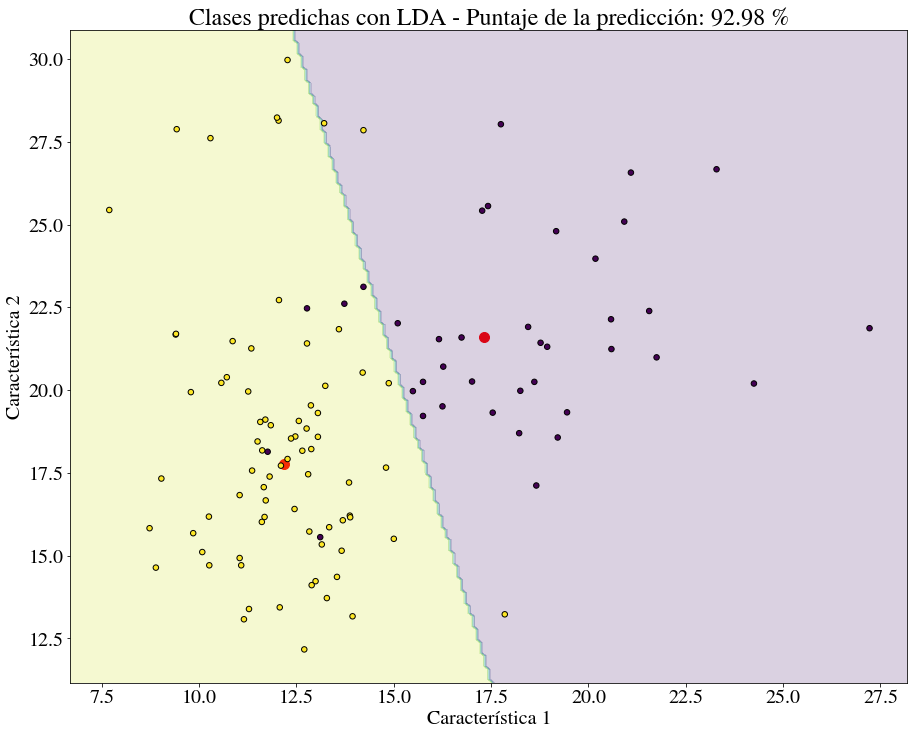

In [ ]:
Salida_1 = LDA.predict(np.c_[x1.ravel(), x2.ravel()]) # Se aplica la predición a partir del modelo LDA
Salida_1 = Salida_1.reshape(x1.shape)

MEDIAS = LDA.means_ # Cálculo de las medias de cada clase con respecto a cada característica

pyplot.subplots(figsize=(15,12))
pyplot.scatter(MEDIAS[0,0], MEDIAS[0,1], c='red', s=100)
pyplot.scatter(MEDIAS[1,0], MEDIAS[1,1], c='red', s=100)
pyplot.contourf(x1, x2, Salida_1, alpha=0.2)
pyplot.scatter(X_Prueba[:, 0], X_Prueba[:, 1], c = Y_Prueba, s = 30, edgecolor='k')
pyplot.xlabel('Característica 1') # Etiqueta del eje x
pyplot.ylabel('Característica 2') # Etiqueta del eje y
pyplot.title('Clases predichas con LDA - Puntaje de la predicción: {:.2f} %'.format(100*(LDA.score(X_Prueba, Y_Prueba)))) # Titulo de la gráfica
pyplot.show()

Clases_Predichas:  [1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0
 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1
 1 1 1]


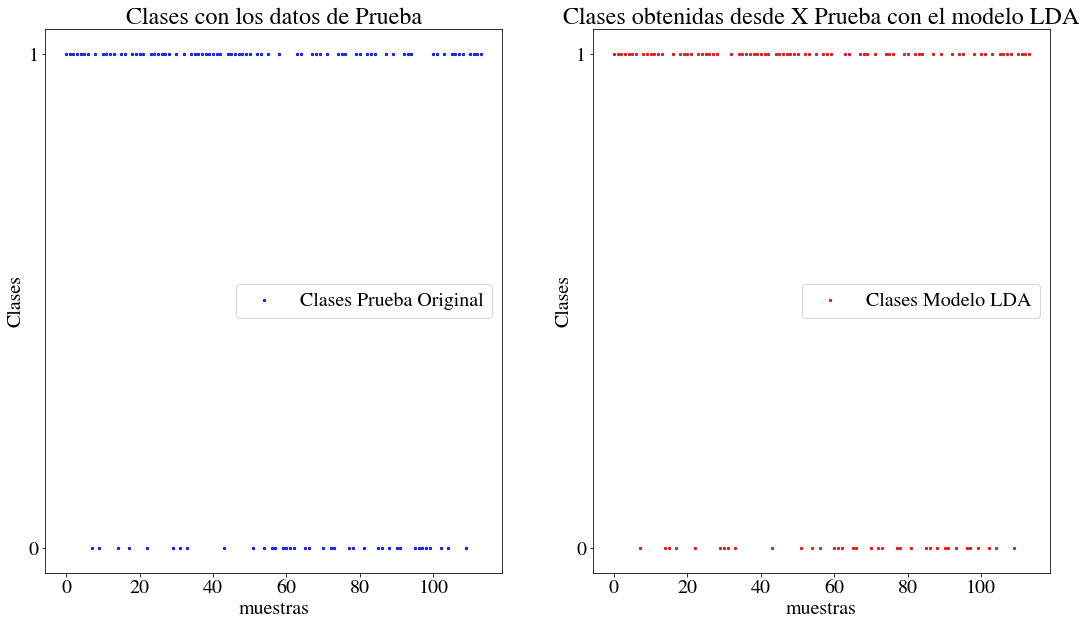

In [ ]:
import numpy as np

Salida_3 = LDA.predict_proba(X_Prueba)
Clases_Predichas = np.argmax(Salida_3, axis = 1) # Se calcula el argumento del máximo valor por cada muestra u observación
print("Clases_Predichas: ", Clases_Predichas)

fig = pyplot.figure(figsize=(18,10))

ax = fig.add_subplot(1, 2, 1)
line_1 = pyplot.scatter(np.arange(len(Y_Prueba)), Y_Prueba, s = 5, edgecolor='b', label='Clases Prueba Original')
pyplot.xlabel('muestras') # Etiqueta del eje x
pyplot.ylabel('Clases') # Etiqueta del eje y
pyplot.title('Clases con los datos de Prueba')
pyplot.yticks([0,1]) # etiquetas de los valores de y
pyplot.legend()

ax = fig.add_subplot(1, 2, 2)
line_2 = pyplot.scatter(np.arange(len(Y_Prueba)), Clases_Predichas, s = 5, edgecolor='r', label='Clases Modelo LDA')
pyplot.xlabel('muestras') # Etiqueta del eje x
pyplot.ylabel('Clases') # Etiqueta del eje y
pyplot.title('Clases obtenidas desde X Prueba con el modelo LDA')
pyplot.yticks([0,1]) # etiquetas de los valores de y
pyplot.legend()

pyplot.show() # Mostrar gráfica

**Matriz de Confusión:**

Es una matriz que permite diferenciar entre diferentes clases de muestras mal clasificadas y bien clasificadas. La matriz considera cuatro definiciones (se usa notaciones binarias):

1) **Verdadero Positivo (TP)**: Es una muestra positiva (1 positivo) correctamente clasificada.

2) **Falso Positivo (FP)**: Es una muestra negativa (0 negativo) clasificada como positiva.

3) **Verdadero Negativo (TN)**: Es una muestra negativa correctamente clasificada.

4) **Falso Negativo (FN)**: Es una muestra positiva clasificada como negativo.

Por lo general, **Falso Positivo** y **Falso Negativo** son errores de clasificación. En cambio, **Verdadero Positivo** y **Verdadero Negativo** son aciertos de la clasificación.

La matriz de confusión esta organizado como:

$$M = \begin{bmatrix} TP & FN\\ FP & TN \end{bmatrix}$$

In [ ]:
from sklearn.metrics import confusion_matrix # Matriz de confusión

Matriz = confusion_matrix(y_true = Y_Prueba, y_pred = Clases_Predichas)
print("Matriz de Confusión del modelo LDA: \n", Matriz)
print("El número de verdaderos positivos es igual a {:.1f} muestras".format(Matriz[0][0]))
print("El número de verdaderos negativos es igual a {:.1f} muestras".format(Matriz[1][1]))
print("El número de falsos negativos es igual a {:.1f} muestras".format(Matriz[0][1]))
print("El número de falsos positivos es igual a {:.1f} muestras".format(Matriz[1][0]))
print("Se clasificaron correctamente {:.1f} muestras".format(Matriz[0][0] + Matriz[1][1]))
print("Se clasificaron incorrectamente {:.1f} muestras".format(Matriz[0][1] + Matriz[1][0]))

Matriz de Confusión del modelo LDA: 
 [[33  5]
 [ 3 73]]
El número de verdaderos positivos es igual a 33.0 muestras
El número de verdaderos negativos es igual a 73.0 muestras
El número de falsos negativos es igual a 5.0 muestras
El número de falsos positivos es igual a 3.0 muestras
Se clasificaron correctamente 106.0 muestras
Se clasificaron incorrectamente 8.0 muestras


**¿El análisis discriminante lineal permite generar dos o más predictores para clasificación múlticlase?** La respuesta es sí. Veamos un ejemplo práctico con 3 clases:

In [ ]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_wine # Datos a clasificar
from sklearn.model_selection import train_test_split # Esta clase realiza la partición de datos en entrenamiento y prueba

data = load_wine()
X = data.data 
Y = data.target
X = X[:,0:2] # Se selecciona dos características para el ejemplo
display(X)
print('Número de muestras = ', X.shape[0])
print('Número de dimensiones = ', X.shape[1])
display(Y)

X_Entrenamiento, X_Prueba, Y_Entrenamiento, Y_Prueba = train_test_split(X, Y, test_size = 0.3, random_state = 17)

print('Tamaño de los datos de entrenamiento: ', X_Entrenamiento.shape)
print('Tamaño de los datos de prueba: ', X_Prueba.shape)
print('Tamaño del vector de clases de entrenamiento: ', Y_Entrenamiento.shape)
print('Tamaño del vector de clases de prueba: ', Y_Prueba.shape)

array([[14.23,  1.71],
       [13.2 ,  1.78],
       [13.16,  2.36],
       [14.37,  1.95],
       [13.24,  2.59],
       [14.2 ,  1.76],
       [14.39,  1.87],
       [14.06,  2.15],
       [14.83,  1.64],
       [13.86,  1.35],
       [14.1 ,  2.16],
       [14.12,  1.48],
       [13.75,  1.73],
       [14.75,  1.73],
       [14.38,  1.87],
       [13.63,  1.81],
       [14.3 ,  1.92],
       [13.83,  1.57],
       [14.19,  1.59],
       [13.64,  3.1 ],
       [14.06,  1.63],
       [12.93,  3.8 ],
       [13.71,  1.86],
       [12.85,  1.6 ],
       [13.5 ,  1.81],
       [13.05,  2.05],
       [13.39,  1.77],
       [13.3 ,  1.72],
       [13.87,  1.9 ],
       [14.02,  1.68],
       [13.73,  1.5 ],
       [13.58,  1.66],
       [13.68,  1.83],
       [13.76,  1.53],
       [13.51,  1.8 ],
       [13.48,  1.81],
       [13.28,  1.64],
       [13.05,  1.65],
       [13.07,  1.5 ],
       [14.22,  3.99],
       [13.56,  1.71],
       [13.41,  3.84],
       [13.88,  1.89],
       [13.

Número de muestras =  178
Número de dimensiones =  2


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

Tamaño de los datos de entrenamiento:  (124, 2)
Tamaño de los datos de prueba:  (54, 2)
Tamaño del vector de clases de entrenamiento:  (124,)
Tamaño del vector de clases de prueba:  (54,)


In [ ]:
LDA_3_Clases = LinearDiscriminantAnalysis(solver = 'svd', store_covariance = True, tol = 1e-5) #svd = Singular value decomposition
LDA_3_Clases.fit(X_Entrenamiento, Y_Entrenamiento)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=True, tol=1e-05)

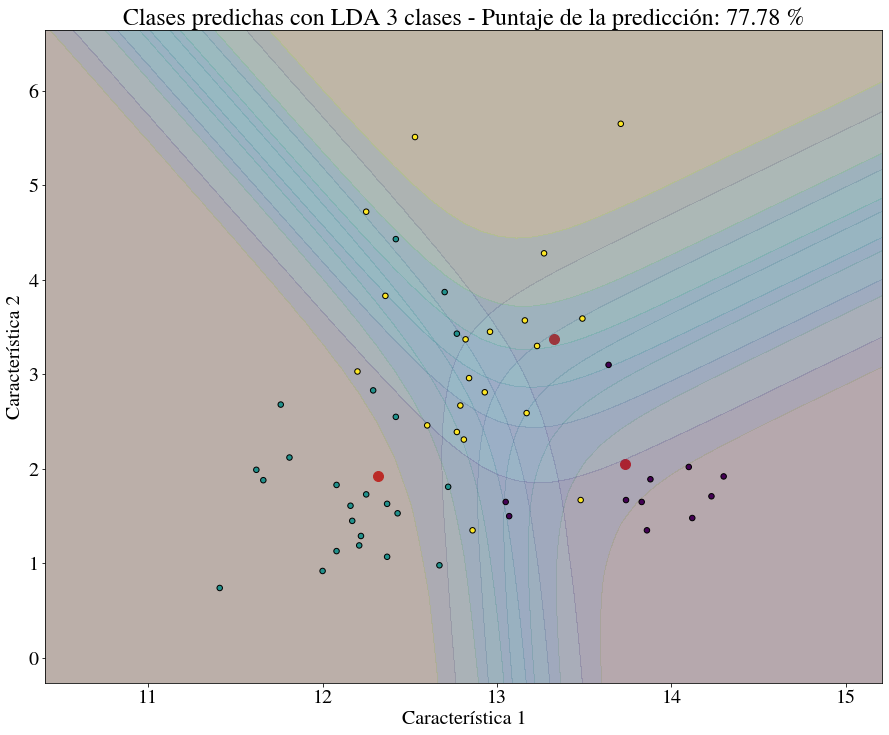

In [ ]:
from matplotlib import pyplot
import matplotlib

matplotlib.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

x_min, x_max = X_Prueba[:, 0].min() - 1, X_Prueba[:, 0].max() + 1 # Valores máximos y mínimos de la característica 1
xx_min, xx_max = X_Prueba[:, 1].min() - 1, X_Prueba[:, 1].max() + 1 # Valores máximos y mínimos de la característica 2
x1, x2 = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(xx_min, xx_max, 0.1)) 
# np.meshgrid regresa las coordenadas de forma matricial desde dos coordenadas x e y vectorial.

Salida_3_Clases = LDA_3_Clases.predict_proba(np.c_[x1.ravel(), x2.ravel()]) # Se aplica la predición a partir del modelo LDA, calculando las probabilidades de cada muestra con respecto a cada clase
Salida_31 = Salida_3_Clases[:,0].reshape(x1.shape) # Organizando las probabilidades de la clase 0
Salida_32 = Salida_3_Clases[:,1].reshape(x1.shape) # Organizando las probabilidades de la clase 1
Salida_33 = Salida_3_Clases[:,2].reshape(x1.shape) # Organizando las probabilidades de la clase 2

MEDIAS = LDA_3_Clases.means_ # Cálculo de las medias de cada clase con respecto a cada característica

pyplot.subplots(figsize=(15,12))
pyplot.scatter(MEDIAS[0,0], MEDIAS[0,1], c='red', s=100)
pyplot.scatter(MEDIAS[1,0], MEDIAS[1,1], c='red', s=100)
pyplot.scatter(MEDIAS[2,0], MEDIAS[2,1], c='red', s=100)
pyplot.contourf(x1, x2, Salida_31, alpha=0.2)
pyplot.contourf(x1, x2, Salida_32, alpha=0.2)
pyplot.contourf(x1, x2, Salida_33, alpha=0.2)
pyplot.scatter(X_Prueba[:, 0], X_Prueba[:, 1], c = Y_Prueba, s = 30, edgecolor='k')
pyplot.xlabel('Característica 1') # Etiqueta del eje x
pyplot.ylabel('Característica 2') # Etiqueta del eje y
pyplot.title('Clases predichas con LDA 3 clases - Puntaje de la predicción: {:.2f} %'.format(100*(LDA_3_Clases.score(X_Prueba, Y_Prueba)))) # Titulo de la gráfica
pyplot.show()

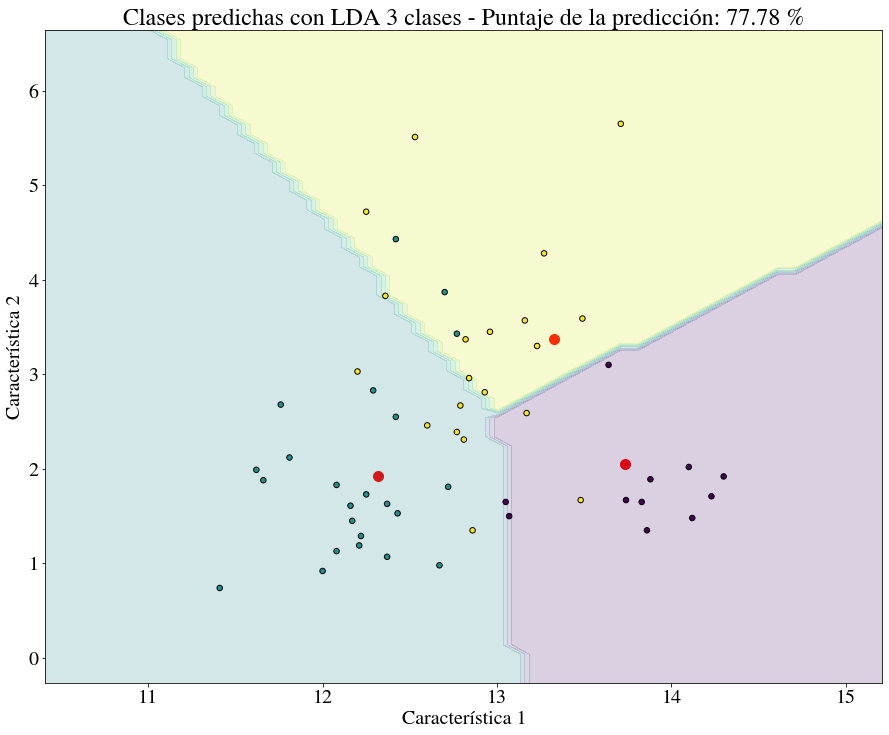

In [ ]:
Salida_33 = LDA_3_Clases.predict(np.c_[x1.ravel(), x2.ravel()]) # Se aplica la predición a partir del modelo LDA
Salida_33 = Salida_33.reshape(x1.shape)

MEDIAS = LDA_3_Clases.means_ # Cálculo de las medias de cada clase con respecto a cada característica

pyplot.subplots(figsize=(15,12))
pyplot.scatter(MEDIAS[0,0], MEDIAS[0,1], c='red', s=100)
pyplot.scatter(MEDIAS[1,0], MEDIAS[1,1], c='red', s=100)
pyplot.scatter(MEDIAS[2,0], MEDIAS[2,1], c='red', s=100)
pyplot.contourf(x1, x2, Salida_33, alpha=0.2)
pyplot.scatter(X_Prueba[:, 0], X_Prueba[:, 1], c = Y_Prueba, s = 30, edgecolor='k')
pyplot.xlabel('Característica 1') # Etiqueta del eje x
pyplot.ylabel('Característica 2') # Etiqueta del eje y
pyplot.title('Clases predichas con LDA 3 clases - Puntaje de la predicción: {:.2f} %'.format(100*(LDA_3_Clases.score(X_Prueba, Y_Prueba)))) # Titulo de la gráfica
pyplot.show()

In [ ]:
from sklearn.metrics import confusion_matrix # Matriz de confusión
import numpy as np

Salida_Tres_Clases = LDA_3_Clases.predict_proba(X_Prueba)
Clases_Predichas_3_Clases = np.argmax(Salida_Tres_Clases, axis = 1) # Se calcula el argumento del máximo valor por cada muestra u observación
print("Clases_Predichas: ", Clases_Predichas_3_Clases)
print("\n")

Matriz = confusion_matrix(y_true = Y_Prueba, y_pred = Clases_Predichas_3_Clases)
print("Matriz de Confusión del modelo LDA: \n", Matriz)
print("Se clasificaron correctamente {:.1f} muestras".format(Matriz[0][0] + Matriz[1][1] + Matriz[2][2]))
print("Se clasificaron incorrectamente {:.1f} muestras".format(Matriz[0][1] + Matriz[0][2] + Matriz[1][0] + Matriz[1][2] + Matriz[2][0] + Matriz[2][1]))

Clases_Predichas:  [1 1 1 0 2 1 0 1 1 0 2 0 1 1 1 2 2 1 1 1 1 1 0 1 2 2 0 1 1 1 0 2 0 0 1 1 0
 2 2 1 2 1 2 2 1 2 1 1 0 0 0 1 1 2]


Matriz de Confusión del modelo LDA: 
 [[11  0  0]
 [ 0 20  3]
 [ 2  7 11]]
Se clasificaron correctamente 42.0 muestras
Se clasificaron incorrectamente 12.0 muestras


# Función de Distribución Gaussiana Condicional

La función de distribución Gaussiana Marginal considera dos conjuntos de variables que son conjuntamente Gaussianas, donde una distribución condicional de un conjunto con respecto a otro conjunto genera de nuevo una distribución Gaussiana.

Para analizar lo anterior, supongamos un conjunto de datos $x$ que es particionado en dos subconjuntos disjuntos, $x_a$ y $x_b$, tal que lo representamos como:

$$x = \begin{bmatrix} x_a\\ x_b\end{bmatrix}$$

A cada partición de los datos le corresponde una media y la covarianza se presentará como una matriz que relaciona ambas particiones.

$$\mu = \begin{bmatrix} \mu_a\\ \mu_b \end{bmatrix};\,\,\,\, \Sigma = \begin{bmatrix} \Sigma_{aa} & \Sigma_{ab}\\ \Sigma_{ba} & \Sigma_{bb}\end{bmatrix}$$

Es importante considerar que la matriz $\Sigma$ es simétrica, es decir que $ \Sigma^T = \Sigma$. A partir de lo anterior, definimos la inversa de $\Sigma$, es decir, $\Sigma^{-1} = \Lambda$, como la **matriz de precisión**, el cual se expresa como:

$$\Sigma^{-1} = \Lambda = \begin{bmatrix} \Lambda_{aa} & \Lambda_{ab}\\ \Lambda_{ba} & \Lambda_{bb}\end{bmatrix}$$

donde $\Lambda$ también es una matriz simétrica.

Considerando los anteriores parámetros, definimos la probabilidad condicional para las particiones $x_a$ y $x_b$, expresado como $p(x_a \vert x_b)$. Para evaluar dicha probabilidad, se considera una distribución conjunta, $p(x) = p(x_a, x_b)$, el cual se fija un valor de $x_b$ y se normaliza la expresión resultante para obtener una distribución válida sobre $x_a$. Teniendo en cuenta $p(x_a, x_b)$ y la forma cuadrática de la distribución Gaussiana multivariable (para recordarlo de nuevo y considerando el signo negativo de la forma cuadrática):

$$- \frac{1}{2}(x - \mu)^T \Sigma^{-1} (x - \mu)$$

Reemplazamos $x$, $\mu$ y $\Sigma^{-1} = \Lambda$ en su forma vectorial y matricial:

$$- \frac{1}{2} \left (\begin{bmatrix} x_a\\ x_b\end{bmatrix} -  \begin{bmatrix} \mu_a\\ \mu_b \end{bmatrix} \right )^T \begin{bmatrix} \Lambda_{aa} & \Lambda_{ab}\\ \Lambda_{ba} & \Lambda_{bb}\end{bmatrix} \left (\begin{bmatrix} x_a\\ x_b\end{bmatrix} -  \begin{bmatrix} \mu_a\\ \mu_b \end{bmatrix} \right )$$

Lo anterior se representa como:

$$- \frac{1}{2} (x_a - \mu_a)^T \Lambda_{aa} (x_a - \mu_a) - \frac{1}{2} (x_a - \mu_a)^T \Lambda_{ab} (x_b - \mu_b) - \frac{1}{2} (x_b - \mu_b)^T \Lambda_{ba} (x_a - \mu_a) - \frac{1}{2} (x_b - \mu_b)^T \Lambda_{bb} (x_b - \mu_b)$$

La anterior expresión cuadrática permite observar que la función de $x_a$ permite establecer que la distribución condicional correspondiente, $p(x_a \vert x_b)$ será una distribución Gaussiana. Debiso a que esta expresión contiene media y covarianza, *se debe identificar aquellas expresiones para la media y covarianza de* $p(x_a \vert x_b)$. Para resolver este problema, la forma cuadrática se puede expresar en términos *exponentes* por medio de una presentación general de la distribución Gaussiana (o también llamado completando el cuadrado), dado por:

$$-\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) = -\frac{1}{2}x^T\Sigma^{-1}x + x^T \Sigma^{-1}\mu + C$$

donde $C$ es un término independiente de $x$. Denotamos la media de $p(x_a \vert x_b)$ como $\mu_{a\vert b}$ y el primer término de la presentación general de la distribución Gaussiana se puede escrtibir como:

$$-\frac{1}{2} x_{a}^T \Lambda_{aa} x_{a}$$

Lo anterior se puede escribir en términos de $x_{a}$ ya que la dependencia funcional de $x_a$ considera a $x_b$ como una constante. Si se presenta este caso, la inversa de la precisión, es decir, $\Lambda_{aa}^{-1}$, será igual a $\Sigma_{a \vert b}$, es decir, $\Sigma_{a \vert b} = \Lambda_{aa}^{-1}$. Este análisis nos permite encontrar **una expresión de $\mu_{a\vert b}$** (en su forma general):

$$\mu_{a\vert b} = \mu_{a} - \Lambda_{aa}^{-1} \Lambda_{ab}(x_b - \mu_b)$$

Esta forma general se obtiene por medio del **complemento de Schur** (Para mayor información, ir: https://www.sciencedirect.com/science/article/pii/0024379586901278).  

De forma práctica, la media y la covarianza para $p(x_a \vert x_b)$ se pueden escribir como un **modelo lineal Gaussiano**:

$$\mu_{a\vert b} = \mu_{a} + \Sigma_{ab} \Sigma_{bb}^{-1} (x_{b} - \mu_{b})$$

$$\Sigma_{a\vert b} = \Sigma_{aa} - \Sigma_{ab} \Sigma_{bb}^{-1} \Sigma_{ba}$$

Veamos un ejemplo práctico de la función de distribución Gaussiana condicional.

In [ ]:
def Gaussians(X, Media, Varianza):
    return ((1. / np.sqrt(2 * np.pi * Varianza)) * np.exp(-(X - Media)**2 / (2 * Varianza)))

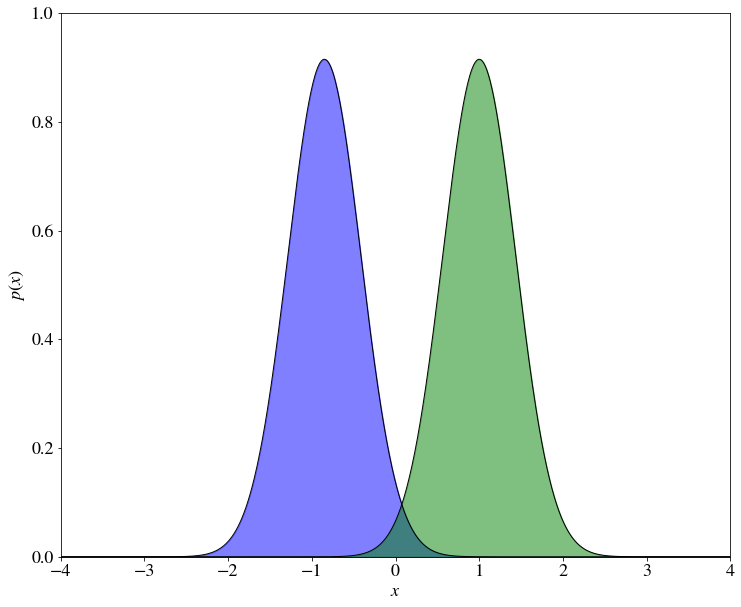

In [ ]:
import numpy as np
from matplotlib import pyplot
from scipy.stats import norm # Distribución Gaussiana
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

media = np.matrix([0.5, 1])
covarianzas = np.matrix([[1, 0.9], [0.9, 1]])

media_1 = media[0,0]
media_2 = media[0,1]

Sigma_AA = covarianzas[0,0]
Sigma_BB = covarianzas[1,1]
Sigma_AB = covarianzas[0,1]
Sigma_BA = covarianzas[1,0]

xa = 0.5
xb = -0.5

media_ab = media_1 + (Sigma_AB*(1/Sigma_BB)*(xb - media_2))
media_ba = media_2 + (Sigma_BA*(1/Sigma_AA)*(xa - media_1))

covarianza_ab = Sigma_AA - (Sigma_AB*(1/Sigma_BB)*Sigma_BA)
covarianza_ba = Sigma_BB - (Sigma_BA*(1/Sigma_AA)*Sigma_AB) 

X_A = np.linspace(-4, 4, 1000)
X_B = np.linspace(-4, 4, 1000)

P_XY = Gaussians(X_A, media_ab, covarianza_ab)
P_YX = Gaussians(X_B, media_ba, covarianza_ba)

fig = pyplot.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
ax.plot(X_A, P_XY, '-k', lw = 1) # Graficar la función de densidad de probabilidad Gaussiana 1
ax.fill_between(X_A, P_XY, color='blue', alpha=0.5) # Rellena con un color el área bajo la curva de una función
ax.plot(X_B, P_YX, '-k', lw=1) # Graficar la función de densidad de probabilidad Gaussiana 2
ax.fill_between(X_B, P_YX, color='green', alpha=0.5) # Rellena con un color el área bajo la curva de una función
ax.set_ylim(0, 1)
ax.set_xlim(-4, 4)

ax.set_xlabel('$x$') # Etiqueta x
ax.set_ylabel('$p(x)$') # Etiqueta de la función de densidad de probabilidad
pyplot.show()

# Función de Distribución Gaussiana Marginal

La distribución Gaussiana Marginal es la distribución de un subconjunto de variables aleatorias desde una distribución original. Por consiguiente, este tipo de distribución representa las probabilidades de las variables en el subconjunto sin referencia de otros valores en la distribución original. 

Considerando la distribución Gaussiana, la función de distribución Gaussiana Marginal establece que si una distribución Gaussiana es Marginal entonces la otra distribución marginal también es marginal. Para alcanzar este objetivo, se evalua la siguiente distribución marginal:

$$p(x_a) = \int p(x_a, x_b) dx_b$$

Para evaluar la integral, nos enfocaremos en la forma cuadrática de la distución conjunta que vimos en la sección anterior, determinando la media y la covarianza de la distribución marginal $p(x_a)$. 

Recordando la forma cuadrática de la distribución conjunta:

$$- \frac{1}{2} (x_a - \mu_a)^T \Lambda_{aa} (x_a - \mu_a) - \frac{1}{2} (x_a - \mu_a)^T \Lambda_{ab} (x_b - \mu_b) - \frac{1}{2} (x_b - \mu_b)^T \Lambda_{ba} (x_a - \mu_a) - \frac{1}{2} (x_b - \mu_b)^T \Lambda_{bb} (x_b - \mu_b)$$

se considera primero los términos $x_b$ y luego completar el cuadrado para facilitar la solución de la integral, lo cual se representa como:

$$-\frac{1}{2} x_b^T \Lambda_{bb} x_b + x_b^Tm$$

donde $m = \Lambda_{bb}\mu_{b} - \Lambda_{ba}(x_a - \mu_{a})$. La anterior forma cuadrática se puede expandir, generando al siguiente abreviación:

$$-\frac{1}{2} (x_b - \Lambda_{bb}^{-1}m)^{T} \Lambda_{bb} (x_b - \Lambda_{bb}^{-1}m) + \frac{1}{2} m^T \Lambda_{bb}^{-1}m$$

donde:

*   $-\frac{1}{2} (x_b - \Lambda_{bb}^{-1}m)^{T} \Lambda_{bb} (x_b - \Lambda_{bb}^{-1}m)$ es la forma cuadrática dependiente de $x_b$
*   $\frac{1}{2} m^T \Lambda_{bb}^{-1}m$ es un término que no tiene dependencia de $x_b$ pero no depende de $x_a$.

Considerando solamente la forma cuadrática dependiente de $x_b$, consideramos una forma Gaussiana para resolver dicha integral:

$$p(x_a) = \int \exp \left \lbrack -\frac{1}{2} (x_b - \Lambda_{bb}^{-1}m)^{T} \Lambda_{bb} (x_b - \Lambda_{bb}^{-1}m) \right \rbrack dx_b$$

Un resultado a la solución de esta integral es la siguiente (la prueba completa se encuentra en: http://cs229.stanford.edu/section/more_on_gaussians.pdf):

$$-\frac{1}{2} x_{a}^T (\Lambda_{aa} - \Lambda_{ab}\Lambda_{bb}^{-1}\Lambda_{ba})x_a + x_{a}^T (\Lambda_{aa} - \Lambda_{ab}\Lambda_{bb}^{-1}\Lambda_{ba})^{-1} \mu_{a} + C$$

donde $C$ es un término independiente de $x_a$. A partir de este resultado, la **covarianza de la distribución marginal de $p(x_a)$** está dado por:

$$\Sigma_a = (\Lambda_{aa} - \Lambda_{ab}\Lambda_{bb}^{-1}\Lambda_{ba})^{-1}$$

La expresión de la covarianza se puede expresar como una matriz de precisión particionado:

$$\begin{bmatrix} \Lambda_{aa} & \Lambda_{ab} \\ \Lambda_{ba} & \Lambda_{bb}\end{bmatrix}^{-1} = \begin{bmatrix} \Sigma_{aa} & \Sigma_{ab} \\ \Sigma_{ba} & \Sigma_{bb}\end{bmatrix}$$

Usando el *complemento de Schur* como se realizo en la distribución Gaussiana condicional, para el caso de la distribución marginal gaussiana se obtiene:

$$\Sigma_{aa} = (\Lambda_{aa} - \Lambda_{ab}\Lambda_{bb}^{-1}\Lambda_{ba})^{-1} $$

Para el caso de la **media de la distribución marginal de $p(x_a)$** esta dado simplemente por $\mu_a$.

A continuación, veamos un ejemplo práctico en Python:

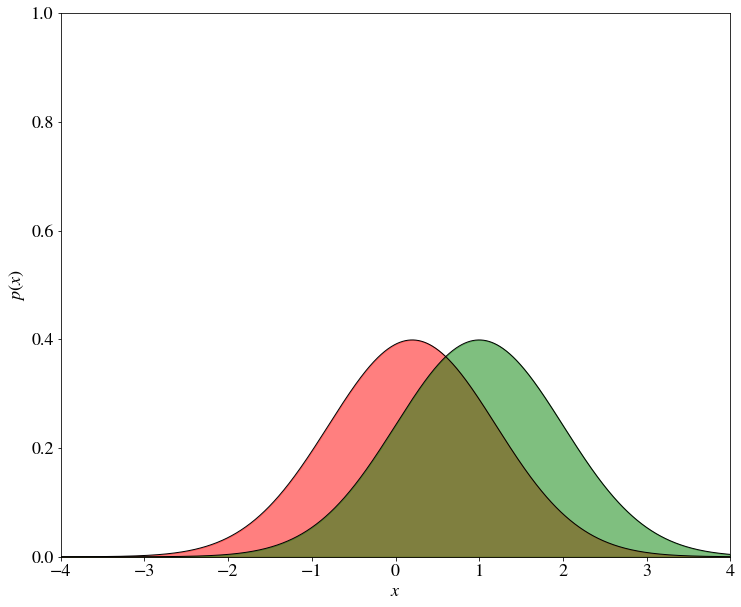

In [ ]:
import numpy as np
from matplotlib import pyplot
from scipy.stats import norm # Distribución Gaussiana
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

media = np.matrix([0.2, 1])
covarianzas = np.matrix([[1, 0.6], [0.6, 1]])

media_1 = media[0,0]
media_2 = media[0,1]

Sigma_AA = covarianzas[0,0]
Sigma_BB = covarianzas[1,1]

X_A = np.linspace(-4, 4, 1000)
X_B = np.linspace(-4, 4, 1000)

P_XY = Gaussians(X_A, media_1, Sigma_AA)
P_YX = Gaussians(X_B, media_2, Sigma_BB)

fig = pyplot.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
ax.plot(X_A, P_XY, '-k', lw = 1) # Graficar la función de densidad de probabilidad Gaussiana 1
ax.fill_between(X_A, P_XY, color='red', alpha=0.5) # Rellena con un color el área bajo la curva de una función
ax.plot(X_B, P_YX, '-k', lw=1) # Graficar la función de densidad de probabilidad Gaussiana 2
ax.fill_between(X_B, P_YX, color='green', alpha=0.5) # Rellena con un color el área bajo la curva de una función
ax.set_ylim(0, 1)
ax.set_xlim(-4, 4)

ax.set_xlabel('$x$') # Etiqueta x
ax.set_ylabel('$p(x)$') # Etiqueta de la función de densidad de probabilidad
pyplot.show()


# Máxima verosimilitud para la Gaussiana

Consideremos un conjunto de datos, $X = \lbrace x_1,\ldots, X_N \rbrace$ donde cada muestra $x_n = \lbrace x_{n,1}, \ldots, x_{n,d}, \ldots, x_{n,D} \rbrace$, siendo $N$ el número de muestras y $D$ el número de dimensiones (más adelante lo llamaremos características). Cada muestra se asume que es analizado *independientemente* desde una distribución Gaussiana multivariable, lo cual se se puede estimar los parámetros de la distribución por medio de la **máxima verosimilitud**. Para este caso, se define la máxima verosimilitud logarítimico para la Gaussiana, dado por:

$$ln \, \, p(X\vert \mu, \Sigma) = - \frac{ND}{2}ln(2\pi) - \frac{N}{2} ln \vert \Sigma \vert - \frac{1}{2} \sum_{n=1}^N (x_n - \mu)^T \Sigma^{-1} (x_n - \mu)$$

Para determinar la media y la covarianza para la máxima verosimilitud, se utiliza una estrategía llamada **suficiencia estadística** que por medio la derivada parcial de la función con respecto a $\mu$, podemos estimar la media de la máxima versosimilitud:

$$\frac{\partial}{\partial \mu} ln\,\, p(X \vert \mu, \Sigma) = \sum_{n=1}^N \Sigma^{-1} (x_n - \mu)$$

Igualando la anterior expresión a 0, se encuentra la media de la máxima verosimilitud para la Gaussiana:

$$\mu_{MV} = \frac{1}{N} \sum_{n=1}^N x_n$$

Para encontrar la covarianza de la máxima verosimilitud de la Gaussiana, se considera una aproximación propuesto por Magnus - Neudecker (más información, ir a: https://projecteuclid.org/euclid.aos/1176344621):

$$\Sigma_{MV} = \frac{1}{N} \sum_{n=1}^N (x_n - \mu_{MV})(x_n - \mu_{MV})^T$$

Al evaluar la experanza de $\mu_{MV}$ y $\Sigma_{MV}$, se determina que:

$$\mathbb{E}\lbrack \mu_{MV}\rbrack = \mu$$

$$\mathbb{E}\lbrack \Sigma_{MV}\rbrack = \frac{N - 1}{N} \Sigma$$

Observen que $\mathbb{E}\lbrack \mu_{MV}\rbrack$ estima la verdadera media de la distribución Gaussiana pero $\mathbb{E}\lbrack \Sigma_{MV}\rbrack$ estima una covarianza menor a la covarianza original de la distribución Gaussiana. Por consiguiene, se utiliza un *estimador de covarianza para la máxima verosimilitud de la Gaussiana*, dado por:

$$\hat{\Sigma} = \frac{1}{N-1} \sum_{n=1}^N (x_n - \mu_{MV})(x_n - \mu_{MV})^T$$

A continuación, vamos a observar un ejemplo práctico:


In [ ]:
def MLE_G(X):                                                                                                                                                                               
    MU = X.mean(axis=0)                                                                                                                                                                            
    VAR = ((X - MU).T @ (X - MU)) / (X.shape[0] - 1) 
    return MU, VAR  

In [ ]:
import numpy as np

media = [0.3, 0.5]                                                                                                                                                                                    
cov = [[1, 0.8], [0.8, 1]]

datos = np.random.multivariate_normal(media, cov, 5000)
media_mv, cov_mv = MLE_G(datos)                                                                                                                                                

print("Máxima Verosimilitud de la media: ", media_mv)
print("Máxima Verosimilitud de la covarianza: ", cov_mv)

Máxima Verosimilitud de la media:  [0.27283664 0.46886087]
Máxima Verosimilitud de la covarianza:  [[1.00777069 0.79096144]
 [0.79096144 0.9894016 ]]


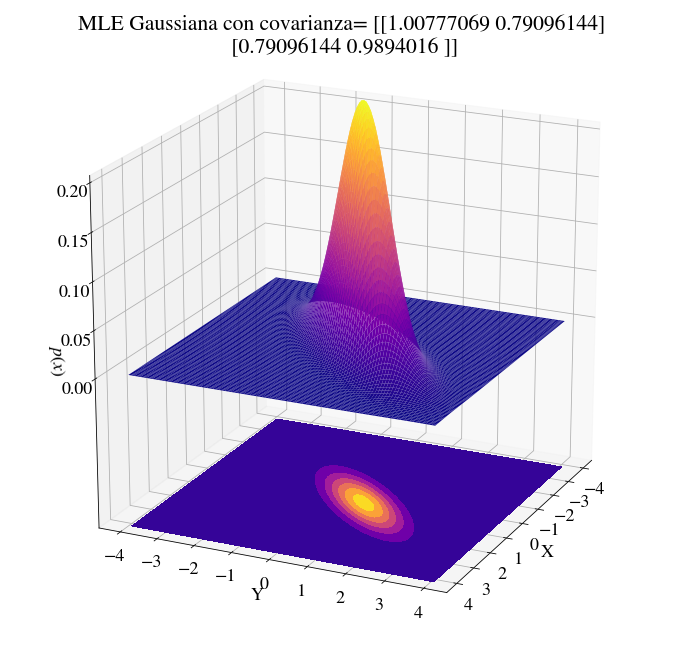

In [ ]:
from scipy.stats import multivariate_normal # Modelo de distribución gaussiana multivariable
from matplotlib import pyplot
from matplotlib import cm
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

X = np.linspace(-4, 4, 100)
Y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(X, Y)

F = np.array([multivariate_normal.pdf(np.array([x,y]), mean = media_mv, cov=cov_mv) for x, y in zip(np.ravel(X), np.ravel(Y))])
FG = F.reshape(X.shape)

fig = pyplot.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, FG, rstride=1, cstride=1, linewidth=1, antialiased=True, cmap=cm.plasma)

cset = ax.contourf(X, Y, FG, zdir='z', offset=-0.16, cmap=cm.plasma)

ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(20, 25)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('$p(x)$')
ax.set_title('MLE Gaussiana con covarianza= {}'.format(cov_mv))

pyplot.show()

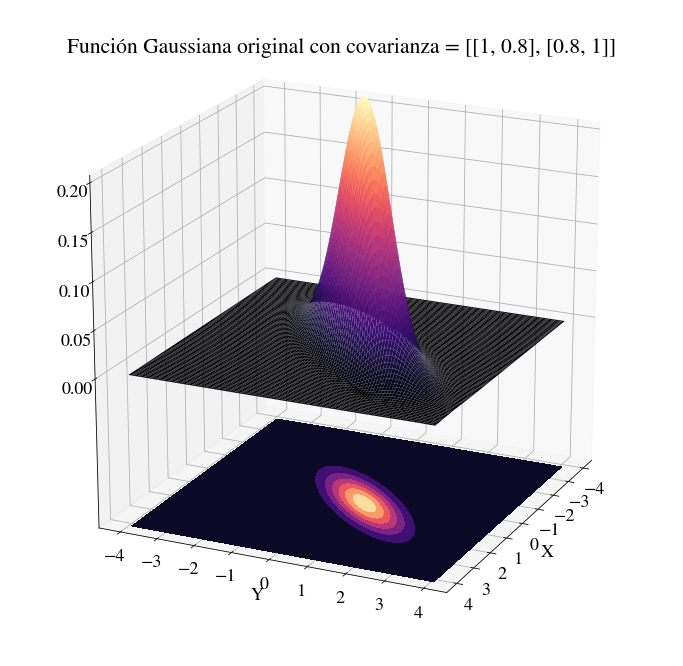

In [ ]:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

X = np.linspace(-4, 4, 100)
Y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(X, Y)

F1 = np.array([multivariate_normal.pdf(np.array([x,y]), mean = media, cov=cov) for x, y in zip(np.ravel(X), np.ravel(Y))])
FG1 = F1.reshape(X.shape)

fig = pyplot.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, FG1, rstride=1, cstride=1, linewidth=1, antialiased=True, cmap=cm.magma)

cset = ax.contourf(X, Y, FG1, zdir='z', offset=-0.16, cmap=cm.magma)

ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(20, 25)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Función Gaussiana original con covarianza = {}'.format(cov))

pyplot.show()

# Inferencia Bayesiana de la Gaussiana

La aproximación Bayesiana esta basado en una consideranción donde los datos están fijos y **no** en el resultado de un proceso de muestreo repetitivo. Por lo general, la aproximación Bayesiana depende de los parámetros que describen los datos probabilísticamente. Considerando este detalle, la **inferencia Bayesiana** está enfocado en producir distribuciones de parámetros que representa todo el conocimiento que podemos extraer desde las muestras de los datos y desde la información apriori acerca de un problema.

Teniendo en cuenta el concepto de inferencia Bayesiana, se analizará como es el tratamiento Bayesiano para introducir distribuciones apriori con los parámetros $\mu$ y $\Sigma$, teniendo en cuenta la máxima verosimilitud para la Gaussiana. Inicialmente, se considera una variable aleatoria Gaussiana $x$ y se conoce la varianza $\sigma^2$ para *inferir* $\mu$ dado un conjunto de datos $X = \lbrace x_1, \ldots, x_N \rbrace$. A partor de lo anterior, se establece una función de verosimilitud que establece la probabilidad de los datos observados dados por una media $\mu$ visto como una función de $\mu$:

$$p(X \vert \mu) = \prod_{n = 1}^N p(x_{n} \vert \mu) = \frac{1}{(2\pi\sigma^2)^\frac{N}{2}} \exp \left \lbrack -\frac{1}{2\sigma^2} \sum_{n=1}^N (x_n - \mu)^2 \right \rbrack$$

La función $p(X \vert \mu)$ no es una función normalizada pero $\mu$ esta implicito en una forma cuadrática $(x_n - \mu)^2$. De esta manera, definimos una probabilidad apriori Gaussiana, $p(\mu)$, que es la distribución conjugada de una media apriori, $\mu_0^2$ y una varianza apriori $\sigma_0^2$. Lo anterior lo definimos como $p(\mu) = \mathcal{N}(\mu\vert \mu_o, \sigma_0^2)$. Por otra parte, definimos una distribución aposteriori dado por:

$$p(\mu \vert X) \propto p(X \vert \mu)p(\mu)$$

La anterior expresión se puede escribir como:

$$p(\mu \vert X) = \mathcal{N}(\mu\vert \mu_N, \sigma_N^2)$$

donde:

$$\mu_N = \frac{\sigma^2}{N\sigma_{0}^2 + \sigma^2}\mu_0 + \frac{N\sigma_0^2}{N\sigma_{0}^2 + \sigma^2} \mu_{MV}$$

$$\frac{1}{\sigma^2_{N}} = \frac{1}{\sigma^2_{0}} + \frac{N}{\sigma^2}$$

Recuerden que $\mathbb{E}\lbrack \mu_{MV}\rbrack = \mu$ y $\sigma_N^2$ se puede expresar como:

$$\sigma_N^2 = \frac{(\sigma \cdot \sigma_{0})^2}{\sigma^2 + N\sigma_0^2}$$

Si $N = 0$ entonces $\mu_{N=0} = \mu_0$ y $\sigma_{N=0}^2 = \sigma_0^2$. Por otra parte, si $N \rightarrow \infty$ entonces $\mu_{N\rightarrow \infty} = \mu_{MV}$ y $\sigma_{N\rightarrow \infty} \approx 0$, si la distribución aposteriori tiende al infinito alrededor de la solución de la máxima verosimilitud. Sin embargo, para un valor finito de $N$, se puede afirmar que $\sigma_N^2 = \sigma^2 / N$.

Veamos un ejemplo práctico de la inferencia Bayesiana de la Gaussiana.

media_N:  [0.39820568 0.55280459]
Covarianza_N:  [[0.09405057 0.05594916]
 [0.05594916 0.11561968]]


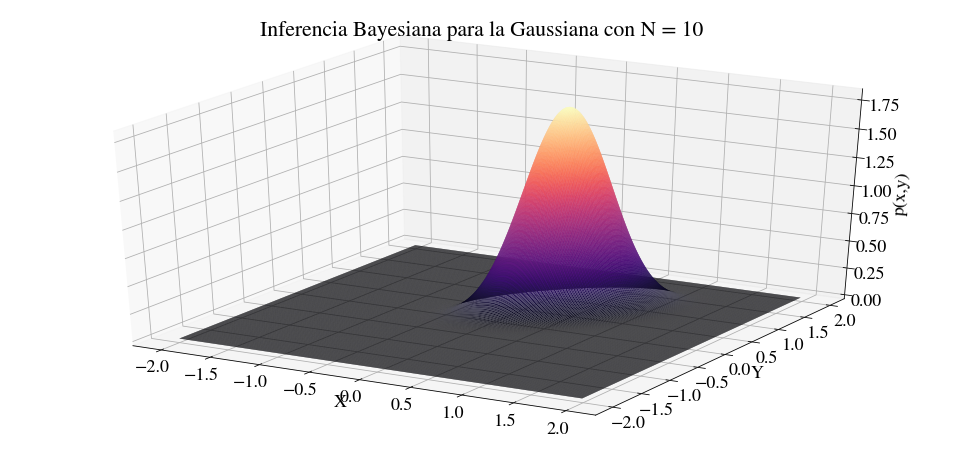

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from scipy.stats import multivariate_normal # Modelo de distribución gaussiana multivariable
import matplotlib
from matplotlib import cm

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

TAM = 10
media_0 = [0.5, 0.9]                                                                                                                                                                              
cov_0 = [[1, 0.8], [0.8, 1]]
X,Y = np.random.multivariate_normal(media_0, cov_0, TAM).T
media_mv = datos.mean(axis=0)
DATAS = pd.DataFrame(data = datos)
cova = DATAS.cov()
cova = np.array(cova)
media_N = (cova/(np.dot(TAM,cov_0) + cova))*media_0 + (np.dot(TAM,cov_0)/(np.dot(TAM,cov_0) + cova))*media_mv
media_N = media_N[0]
sigma_N = (cova*cov_0)**2/(cova + np.dot(TAM,cov_0))

x, y = np.mgrid[-2:2:0.01, -2:2:0.01]
f = multivariate_normal(media_N, sigma_N)
pos = np.dstack((x, y))
ff = f.pdf(pos)

print("media_N: ", media_N)
print("Covarianza_N: ", sigma_N)

fig = pyplot.figure(figsize=(17,8))
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, ff, rstride=1, cstride=1, linewidth=1, antialiased=True, cmap=cm.magma)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('p(x,y)')
ax.set_title('Inferencia Bayesiana para la Gaussiana con N = {}'.format(TAM))
pyplot.show()

media_N:  [0.38897362 0.51876297]
Covarianza_N:  [[0.01025803 0.00614348]
 [0.00614348 0.01272939]]


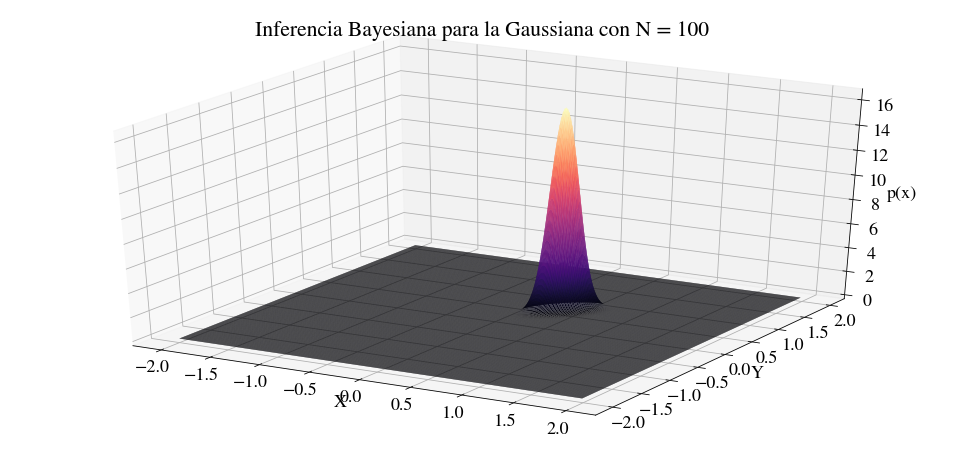

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from scipy.stats import multivariate_normal # Modelo de distribución gaussiana multivariable
import matplotlib
from matplotlib import cm

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

TAM = 100
media_0 = [0.5, 0.9]                                                                                                                                                                              
cov_0 = [[1, 0.8], [0.8, 1]]
X,Y = np.random.multivariate_normal(media_0, cov_0, TAM).T
media_mv = datos.mean(axis=0)
DATAS = pd.DataFrame(data = datos)
cova = DATAS.cov()
cova = np.array(cova)
media_N_1 = (cova/(np.dot(TAM,cov_0) + cova))*media_0 + (np.dot(TAM,cov_0)/(np.dot(TAM,cov_0) + cova))*media_mv
media_N_1 = media_N_1[0]
sigma_N_1 = (cova*cov_0)**2/(cova + np.dot(TAM,cov_0))

x, y = np.mgrid[-2:2:0.01, -2:2:0.01]
f = multivariate_normal(media_N_1, sigma_N_1)
pos = np.dstack((x, y))
ff = f.pdf(pos)

print("media_N: ", media_N_1)
print("Covarianza_N: ", sigma_N_1)

fig = pyplot.figure(figsize=(17,8))
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, ff, rstride=1, cstride=1, linewidth=1, antialiased=True, cmap=cm.magma)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('p(x)')
ax.set_title('Inferencia Bayesiana para la Gaussiana con N = {}'.format(TAM))
pyplot.show()

# Clasificador Bayes Ingenuo (Naive Bayes)


Es un clasificador que considera una condisión ingenua en el cual implica la *independencia condicional* de causas (más adelante se explicará esa parte). Lo anterior parece ser díficil de aceptar en muchos contextos donde la probabilidad de una variable o característica es estrictamente correlacionado con otra variable o característica. Sin embargo, hay una condición particular (no es tan raro que ocurra) donde diferentes dependencias se despejan uno tras otra, permitiendo que el clasificador ingenuo alcance su máximo desempeño para predecir clases aún que su ingenuidad sea alterado. 

Para analizar el funcionamiento del clasificador Bayes ingenuo, se define el **factor de normalización, $\alpha$** que relaciona $P(x\vert y)$ con $P(y)$, generando como resultado final la probabilidad aposteriori, $P(y\vert x)$:

$$P(y\vert x) = \alpha P(x\vert y)P(y)$$

Si consideramos $x$ como un conjunto de datos, $x = \lbrace x_{1,1}, \ldots, x_{n,d}, \ldots, x_{N,D} \rbrace$, seleccionamos un vector de datos, $x_n = \lbrace x_{n,1}, \ldots, x_{n,d}, \ldots, x_{n,D} \rbrace$, y además, definimos un vector de clases, $y = \lbrace y_1, \ldots, y_n, \ldots, y_N \rbrace$, asumimos la *independencia condicional* como el efecto que produce cada causa o clase que es independiente de otro:

$$P(y\vert x_n) = \alpha \cdot P(y) \prod_{n} P(x_n\vert y)$$

Lo anterior muestra que los valores de la probabilidad apriori marginal $P(y)$ y de las probabilidad condicionales $P(x_n\vert y)$ se obtienen a través de un **conteo de frecuencias**; por consiguiente, para un vector de datos $x_n$, la clase predicha es uno de los cuales la probabilidad aposteriori $P(y\vert x_n)$ tiene el *máximo valor de probabilidad*.

Teniendo en cuenta que en el tema visto de los **estimadores Bayesianos** se observó como el cambio de una función de probabilidad apriori puede generar una menor o mayor pérdida en la estimación de las mejores media y varianza para tomar la mejor decisión sobre los datos, se debe analizar cuál función apriori genera el mejor desemepeño para predecir con menor margen de error las clases. Por consiguiente, vamos a analizar tres propuestas basado en la función de probabilidad de Bernoulli, multinomial y Gaussiana.



## Bayes ingenuo Bernoulli

En esta primera propuesta, se asume que $X$ es una variable aleatoria y la probabilidad de Bernoulli, $P(X)$ puede asumir dos casos: 0 o 1:

$$P(X) = \begin{cases} a & Si\,\, X = 1 \\ b & Si\,\, X = 0\end{cases}$$

donde $a$ es un valor entre 0 y 1 y $b = 1 - a$, que es el complemento de $a$. 

Veamos un ejemplo práctico de esta propuesta.

In [ ]:
import numpy as np
from sklearn.naive_bayes import BernoulliNB # Bayes ingenuo Bernoulli
from sklearn.datasets import load_breast_cancer # Datos a clasificar
from sklearn.model_selection import train_test_split # Esta clase realiza la partición de datos en entrenamiento y prueba

data = load_breast_cancer()
X = data.data 
Y = data.target
X = X[:,0:2] # Se selecciona dos características para el ejemplo
display(X)
print('Número de muestras = ', X.shape[0])
print('Número de dimensiones = ', X.shape[1])
display(Y)

X_Entrenamiento, X_Prueba, Y_Entrenamiento, Y_Prueba = train_test_split(X, Y, test_size = 0.2, random_state = 17)

print('Tamaño de los datos de entrenamiento: ', X_Entrenamiento.shape)
print('Tamaño de los datos de prueba: ', X_Prueba.shape)
print('Tamaño del vector de clases de entrenamiento: ', Y_Entrenamiento.shape)
print('Tamaño del vector de clases de prueba: ', Y_Prueba.shape)

array([[17.99, 10.38],
       [20.57, 17.77],
       [19.69, 21.25],
       ...,
       [16.6 , 28.08],
       [20.6 , 29.33],
       [ 7.76, 24.54]])

Número de muestras =  569
Número de dimensiones =  2


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

Tamaño de los datos de entrenamiento:  (455, 2)
Tamaño de los datos de prueba:  (114, 2)
Tamaño del vector de clases de entrenamiento:  (455,)
Tamaño del vector de clases de prueba:  (114,)


In [ ]:
ALFA = 0.9
BNB = BernoulliNB(alpha = ALFA, binarize = 0.0) # binarize es un umbral binario, donde 0.0 indica que cada dato puede ser caracterizado por un cuadrante donde se puede localizar su valor. 
                                               # Ese cuadrante esta dado por un eje de coordenadas de cuatro cuadrantes, (0,0), (0,1), (1,0) y (1,1), donde los cuadrantes (0,0) y (0,1) pertenecen
                                               # la clase 0 y los cuadrantes (1,0) y (1,0) pertenecen a la clase 1. De esa manera, se puede clasificar los datos. Si usa un valor diferente del parámetro
                                               # binarize, entonces se asume que la función de distribución de Bernoulli es continuo.
BNB.fit(X_Entrenamiento,Y_Entrenamiento)
print("Número de muestras u observaciones encontradas por cada clase asociado a una característica (Clases x Características): \n",BNB.feature_count_)

Número de muestras u observaciones encontradas por cada clase asociado a una característica (Clases x Características): 
 [[174. 174.]
 [281. 281.]]


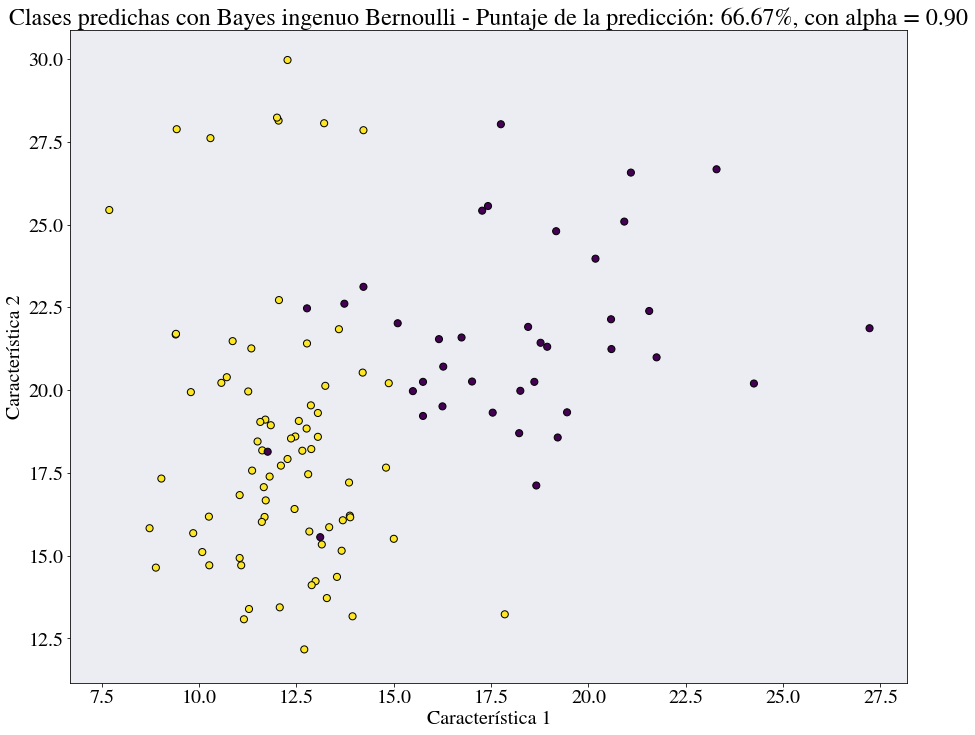

In [ ]:
from matplotlib import pyplot
import matplotlib

matplotlib.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

x_min, x_max = X_Prueba[:, 0].min() - 1, X_Prueba[:, 0].max() + 1 # Valores máximos y mínimos de la característica 1
xx_min, xx_max = X_Prueba[:, 1].min() - 1, X_Prueba[:, 1].max() + 1 # Valores máximos y mínimos de la característica 2
x1, x2 = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(xx_min, xx_max, 0.1)) 
# np.meshgrid regresa las coordenadas de forma matricial desde dos coordenadas x e y vectorial.

Salida_BNB = BNB.predict(np.c_[x1.ravel(), x2.ravel()]) # Se aplica la predición a partir del modelo BNB.
Salida_BNB = Salida_BNB.reshape(x1.shape)

pyplot.subplots(figsize=(15,12))
pyplot.contourf(x1, x2, Salida_BNB, alpha=0.1)
pyplot.scatter(X_Prueba[:, 0], X_Prueba[:, 1], c = Y_Prueba, s = 50, edgecolor='k')
pyplot.xlabel('Característica 1') # Etiqueta del eje x
pyplot.ylabel('Característica 2') # Etiqueta del eje y
pyplot.title('Clases predichas con Bayes ingenuo Bernoulli - Puntaje de la predicción: {:.2f}%, con alpha = {:.2f}'.format(100*(BNB.score(X_Prueba, Y_Prueba)),ALFA)) # Titulo de la gráfica
pyplot.show()

In [ ]:
from sklearn.metrics import confusion_matrix # Matriz de confusión

Clases_Predichas = BNB.predict(X_Prueba)

Matriz = confusion_matrix(y_true = Y_Prueba, y_pred = Clases_Predichas)
print("Matriz de Confusión del modelo LDA: \n", Matriz)
print("El número de verdaderos positivos es igual a {:.1f} muestras".format(Matriz[0][0]))
print("El número de verdaderos negativos es igual a {:.1f} muestras".format(Matriz[1][1]))
print("El número de falsos negativos es igual a {:.1f} muestras".format(Matriz[0][1]))
print("El número de falsos positivos es igual a {:.1f} muestras".format(Matriz[1][0]))
print("Se clasificaron correctamente {:.1f} muestras".format(Matriz[0][0] + Matriz[1][1]))
print("Se clasificaron incorrectamente {:.1f} muestras".format(Matriz[0][1] + Matriz[1][0]))

Matriz de Confusión del modelo LDA: 
 [[ 0 38]
 [ 0 76]]
El número de verdaderos positivos es igual a 0.0 muestras
El número de verdaderos negativos es igual a 76.0 muestras
El número de falsos negativos es igual a 38.0 muestras
El número de falsos positivos es igual a 0.0 muestras
Se clasificaron correctamente 76.0 muestras
Se clasificaron incorrectamente 38.0 muestras


## Bayes ingenuo Multinomial

En esta segunda propuesta, la distribución multinomial es útil para modelar el vector de datos $x_n$ donde cada valor representa por ejemplo, el número de ocurrencias o de frecuencias relativas. Esta distribución, $P(X)$, está dado por:

$$P(X) = \frac{N!}{\prod_n x_n!} \prod_n p_{n}^{x_n}$$

donde $p_n$ es la probabilidad calculada de acuerdo al número de ocurrencias de cada vector de datos $x_n$. Es importante considerar que se recomienda usar esta propuesta con $alpha = 1$ para obtener un modelo estable y con el mejor desemepeño posible.

Veamos un ejemplo práctico de esta propuesta.

In [ ]:
from sklearn.naive_bayes import MultinomialNB # Bayes ingenuo Multinomial

MNB = MultinomialNB(alpha = 1)
MNB.fit(X_Entrenamiento,Y_Entrenamiento)
print("Número de muestras u observaciones encontradas por cada clase asociado: \n",MNB.class_count_)

Número de muestras u observaciones encontradas por cada clase asociado: 
 [174. 281.]


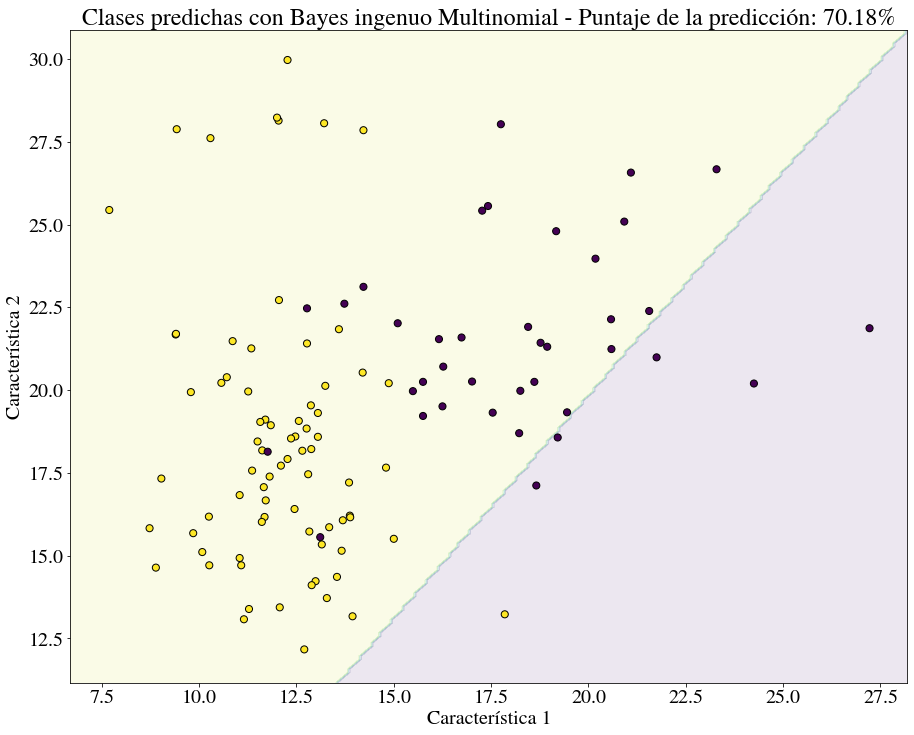

In [ ]:
from matplotlib import pyplot
import matplotlib

matplotlib.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

x_min, x_max = X_Prueba[:, 0].min() - 1, X_Prueba[:, 0].max() + 1 # Valores máximos y mínimos de la característica 1
xx_min, xx_max = X_Prueba[:, 1].min() - 1, X_Prueba[:, 1].max() + 1 # Valores máximos y mínimos de la característica 2
x1, x2 = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(xx_min, xx_max, 0.1)) 
# np.meshgrid regresa las coordenadas de forma matricial desde dos coordenadas x e y vectorial.

Salida_MNB = MNB.predict(np.c_[x1.ravel(), x2.ravel()]) # Se aplica la predición a partir del modelo MNB.
Salida_MNB = Salida_MNB.reshape(x1.shape)

pyplot.subplots(figsize=(15,12))
pyplot.contourf(x1, x2, Salida_MNB, alpha=0.1)
pyplot.scatter(X_Prueba[:, 0], X_Prueba[:, 1], c = Y_Prueba, s = 50, edgecolor='k')
pyplot.xlabel('Característica 1') # Etiqueta del eje x
pyplot.ylabel('Característica 2') # Etiqueta del eje y
pyplot.title('Clases predichas con Bayes ingenuo Multinomial - Puntaje de la predicción: {:.2f}%'.format(100*(MNB.score(X_Prueba, Y_Prueba)))) # Titulo de la gráfica
pyplot.show()

In [ ]:
from sklearn.metrics import confusion_matrix # Matriz de confusión

Clases_Predichas = MNB.predict(X_Prueba)

Matriz = confusion_matrix(y_true = Y_Prueba, y_pred = Clases_Predichas)
print("Matriz de Confusión del modelo LDA: \n", Matriz)
print("El número de verdaderos positivos es igual a {:.1f} muestras".format(Matriz[0][0]))
print("El número de verdaderos negativos es igual a {:.1f} muestras".format(Matriz[1][1]))
print("El número de falsos negativos es igual a {:.1f} muestras".format(Matriz[0][1]))
print("El número de falsos positivos es igual a {:.1f} muestras".format(Matriz[1][0]))
print("Se clasificaron correctamente {:.1f} muestras".format(Matriz[0][0] + Matriz[1][1]))
print("Se clasificaron incorrectamente {:.1f} muestras".format(Matriz[0][1] + Matriz[1][0]))

Matriz de Confusión del modelo LDA: 
 [[ 5 33]
 [ 1 75]]
El número de verdaderos positivos es igual a 5.0 muestras
El número de verdaderos negativos es igual a 75.0 muestras
El número de falsos negativos es igual a 33.0 muestras
El número de falsos positivos es igual a 1.0 muestras
Se clasificaron correctamente 80.0 muestras
Se clasificaron incorrectamente 34.0 muestras


## Bayes ingenuo Gaussiano

En esta tercera propuesta, se utiliza la función de distribución Gaussiana como probabilidad apriori, y como vimos en la teoría del estimador Bayesiano, si una función apriori es Gaussiana entonces la función aposteriori también es Gaussiana. Por lo general, se debe estimar la media y la varianza de cada vector de datos $x_n$ usando una aproximación de máxima verosimilitud para la Gaussiana (como lo vimos en una de las secciones anteriores). En este caso, se considera una verosimilitud logarítmica:

$$L(\mu; \sigma^2; x_n\vert y) = \sum_n \log P(x_n \vert y)$$

donde $P(x_n \vert y)$ es una Gaussiana.

Veamos un ejemplo práctico:

In [ ]:
from sklearn.naive_bayes import GaussianNB # Bayes ingenuo Gaussiano

GNB = GaussianNB(var_smoothing = 1e-8) # var_smoothing es la porción de la mayor variación de todas las características que se añade a las variaciones para la estabilidad del cálculo.
GNB.fit(X_Entrenamiento,Y_Entrenamiento)
print("Número de muestras u observaciones encontradas por cada clase asociado: \n",GNB.class_count_)

Número de muestras u observaciones encontradas por cada clase asociado: 
 [174. 281.]


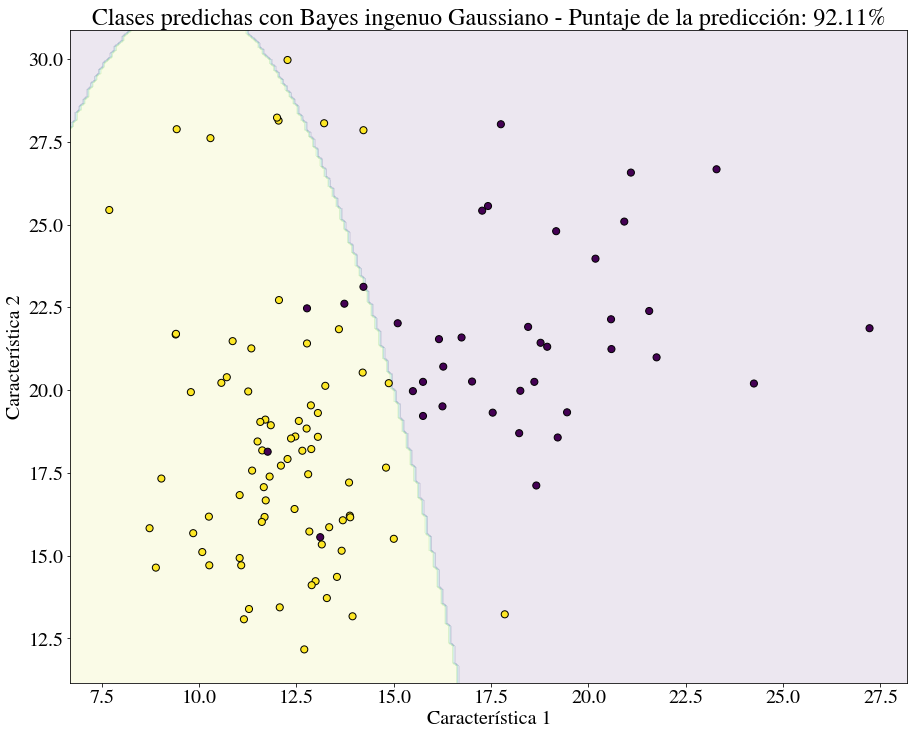

In [ ]:
from matplotlib import pyplot
import matplotlib

matplotlib.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

x_min, x_max = X_Prueba[:, 0].min() - 1, X_Prueba[:, 0].max() + 1 # Valores máximos y mínimos de la característica 1
xx_min, xx_max = X_Prueba[:, 1].min() - 1, X_Prueba[:, 1].max() + 1 # Valores máximos y mínimos de la característica 2
x1, x2 = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(xx_min, xx_max, 0.1)) 
# np.meshgrid regresa las coordenadas de forma matricial desde dos coordenadas x e y vectorial.

Salida_GNB = GNB.predict(np.c_[x1.ravel(), x2.ravel()]) # Se aplica la predición a partir del modelo GNB.
Salida_GNB = Salida_GNB.reshape(x1.shape)

pyplot.subplots(figsize=(15,12))
pyplot.contourf(x1, x2, Salida_GNB, alpha=0.1)
pyplot.scatter(X_Prueba[:, 0], X_Prueba[:, 1], c = Y_Prueba, s = 50, edgecolor='k')
pyplot.xlabel('Característica 1') # Etiqueta del eje x
pyplot.ylabel('Característica 2') # Etiqueta del eje y
pyplot.title('Clases predichas con Bayes ingenuo Gaussiano - Puntaje de la predicción: {:.2f}%'.format(100*(GNB.score(X_Prueba, Y_Prueba)))) # Titulo de la gráfica
pyplot.show()

In [ ]:
from sklearn.metrics import confusion_matrix # Matriz de confusión

Clases_Predichas = GNB.predict(X_Prueba)

Matriz = confusion_matrix(y_true = Y_Prueba, y_pred = Clases_Predichas)
print("Matriz de Confusión del modelo LDA: \n", Matriz)
print("El número de verdaderos positivos es igual a {:.1f} muestras".format(Matriz[0][0]))
print("El número de verdaderos negativos es igual a {:.1f} muestras".format(Matriz[1][1]))
print("El número de falsos negativos es igual a {:.1f} muestras".format(Matriz[0][1]))
print("El número de falsos positivos es igual a {:.1f} muestras".format(Matriz[1][0]))
print("Se clasificaron correctamente {:.1f} muestras".format(Matriz[0][0] + Matriz[1][1]))
print("Se clasificaron incorrectamente {:.1f} muestras".format(Matriz[0][1] + Matriz[1][0]))

Matriz de Confusión del modelo LDA: 
 [[33  5]
 [ 4 72]]
El número de verdaderos positivos es igual a 33.0 muestras
El número de verdaderos negativos es igual a 72.0 muestras
El número de falsos negativos es igual a 5.0 muestras
El número de falsos positivos es igual a 4.0 muestras
Se clasificaron correctamente 105.0 muestras
Se clasificaron incorrectamente 9.0 muestras
